In [ ]:
#Loading needed libraries
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
#Saving data in shared path and checking if connection has been established
!ls /datasets/rent_prioritisation

housing_index_state_adj.geojson


In [ ]:
#Reading the rent prioritisation data made available by the Urban Institute 
rent_data = gpd.read_file('/datasets/rent_prioritisation/housing_index_state_adj.geojson')

In [ ]:
rent_data.head()

GEOID state_name       county_name state_fips county_fips  \
0  01073005701    Alabama  Jefferson County         01       01073   
1  01073010704    Alabama  Jefferson County         01       01073   
2  01073012908    Alabama  Jefferson County         01       01073   
3  01073005302    Alabama  Jefferson County         01       01073   
4  01073011107    Alabama  Jefferson County         01       01073   

   perc_cost_burdened_under_35k  perc_overcrowding_renter_1.50_or_more  \
0                      0.691943                               0.000000   
1                      0.533333                               0.012195   
2                      0.582278                               0.000000   
3                      0.386667                               0.000000   
4                      0.750000                               0.000000   

   perc_unemployed_laborforce  perc_renters  perc_poverty_12mnth  ...  \
0                    0.171334      0.412351             0.194963  ...   
1                    0.063052      0.525220             0.097222  ...   
2                    0.058507      0.606704             0.135747  ...   
3                    0.040827      0.214047             0.087376  ...   
4                    0.053528      0.078071             0.087675  ...   

   z_score_perc_poverty_12mnth_quantile  z_score_perc_no_hinsure_quantile  \
0                                  0.55                              0.23   
1                                  0.21                              0.12   
2                                  0.34                              0.80   
3                                  0.17                              0.48   
4                                  0.17                              0.13   

   z_score_perc_person_of_color_quantile  \
0                                   0.96   
1                                   0.45   
2                                   0.74   
3                                   0.66   
4                                   0.21   

   z_score_perc_public_assistance_quantile  \
0                                     0.01   
1                                     0.01   
2                                     0.70   
3                                     0.58   
4                                     0.63   

   z_score_perc_foreign_born_quantile  z_score_perc_30hamfi_quantile  \
0                                0.33                           0.47   
1                                0.85                           0.37   
2                                0.99                           0.24   
3                                0.58                           0.23   
4                                0.40                           0.29   

   z_score_perc_low_income_jobs_lost_quantile  num_ELI  grayed_out  \
0                                        0.93    100.0         0.0   
1                                        0.83    130.0         0.0   
2                                        0.87    185.0         0.0   
3                                        0.59     40.0         0.0   
4                                        0.64     70.0         0.0   

                                            geometry  
0  MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...  
1  MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...  
2  MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...  
3  MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...  
4  MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...  

[5 rows x 49 columns]

## Plotting Rental Assistance Against Redlining Maps

In [ ]:
#Reading the redlining data made available by the Mapping Inequality Project
redline_data = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/redlining_all/shapefile/holc_ad_data.shp')
redline_data.head()

polygon_id state        city  \
0       244.0    AL  Birmingham   
1       193.0    AL  Birmingham   
2       206.0    AL  Birmingham   
3       203.0    AL  Birmingham   
4       189.0    AL  Birmingham   

                                                name holc_id holc_grade  \
0  Mountain Brook Estates and Country Club Garden...      A1          A   
1  Redmont Park, Rockridge Park, Warwick Manor, a...      A2          A   
2   Colonial Hills, Pine Crest (outside city limits)      A3          A   
3  Grove Park, Hollywood, Mayfair, and Edgewood s...      B1          B   
4                 Best section of Woodlawn Highlands     B10          B   

                                          area_descr  \
0  { "3n" : "50-100 75-125 1936 N/A N/A No rental...   
1  { "3n" : "N/A N/A No rentals No rentals 55 50-...   
2  { "2f" : "None", "31" : "75", "3b" : "Brick ve...   
3  { "2a" : "Business men and clerical workers", ...   
4  { "5" : "Both sales and rental prices in 1929 ...   

                                            geometry  
0  POLYGON ((-86.75678 33.49754, -86.75692 33.495...  
1  POLYGON ((-86.75867 33.50933, -86.76093 33.508...  
2  POLYGON ((-86.75678 33.49754, -86.75196 33.501...  
3  POLYGON ((-86.80111 33.48071, -86.80099 33.480...  
4  POLYGON ((-86.74923 33.53333, -86.74916 33.530...

In [ ]:
def rent_redlining_map(y1,y2,x1,x2,city):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 10))
    ax1.set_title('Rental Prioritisation '+city, fontsize=18)
    rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

    ax2.set_title('Redlining in '+city, fontsize=18)
    redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

    ax1.set_ylim(y1,y2)
    ax1.set_xlim(x1,x2)

    ax2.set_ylim(y1,y2)
    ax2.set_xlim(x1,x2)

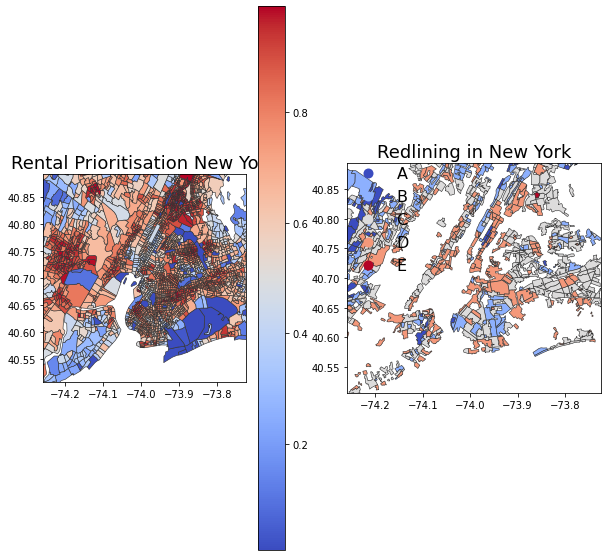

In [ ]:
rent_redlining_map(40.506299, 40.893601,-74.259376, -73.725166,'New York')

(-74.259376, -73.725166)

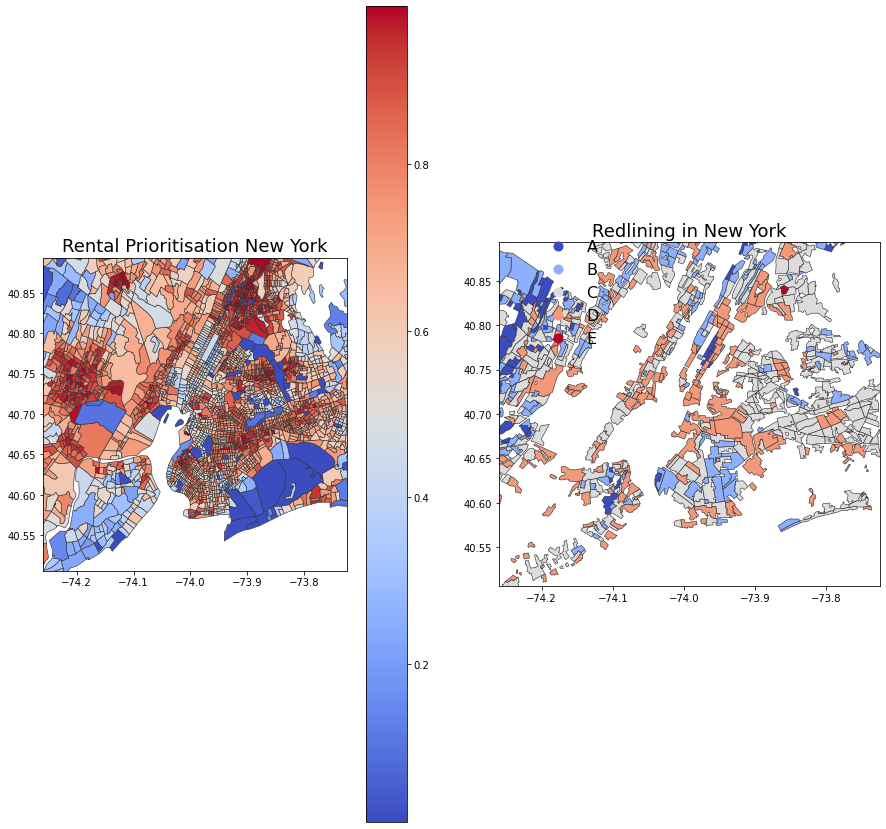

In [ ]:
#Mapping both data for New York City
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation New York', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Redlining in New York', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(40.506299, 40.893601)
ax1.set_xlim(-74.259376, -73.725166)

ax2.set_ylim(40.506299, 40.893601)
ax2.set_xlim(-74.259376, -73.725166)

(-118.553885, -118.099326)

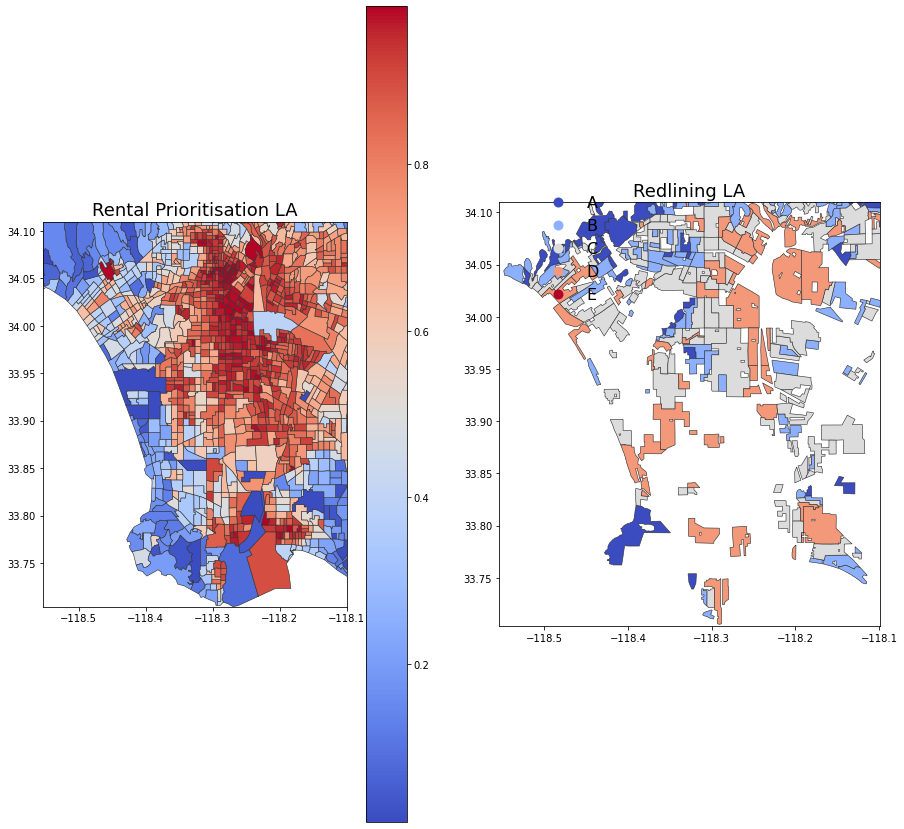

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation LA', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining LA', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(33.703996, 34.109748)
ax1.set_xlim(-118.553885, -118.099326)

ax2.set_ylim(33.703996, 34.109748)
ax2.set_xlim(-118.553885, -118.099326)


(-122.518342, -122.354233)

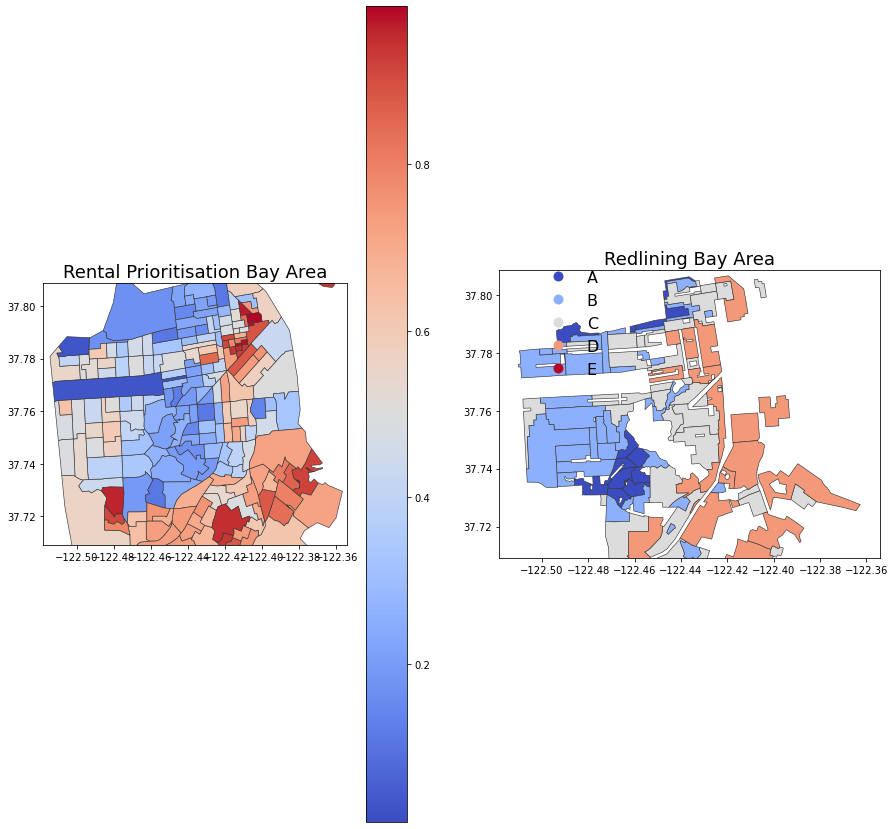

In [ ]:
#Mapping both data for Bay Area
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Bay Area', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Bay Area', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(37.709061, 37.808676)
ax1.set_xlim(-122.518342, -122.354233)

ax2.set_ylim(37.709061, 37.808676)
ax2.set_xlim(-122.518342, -122.354233)


(-87.684688, -87.508906)

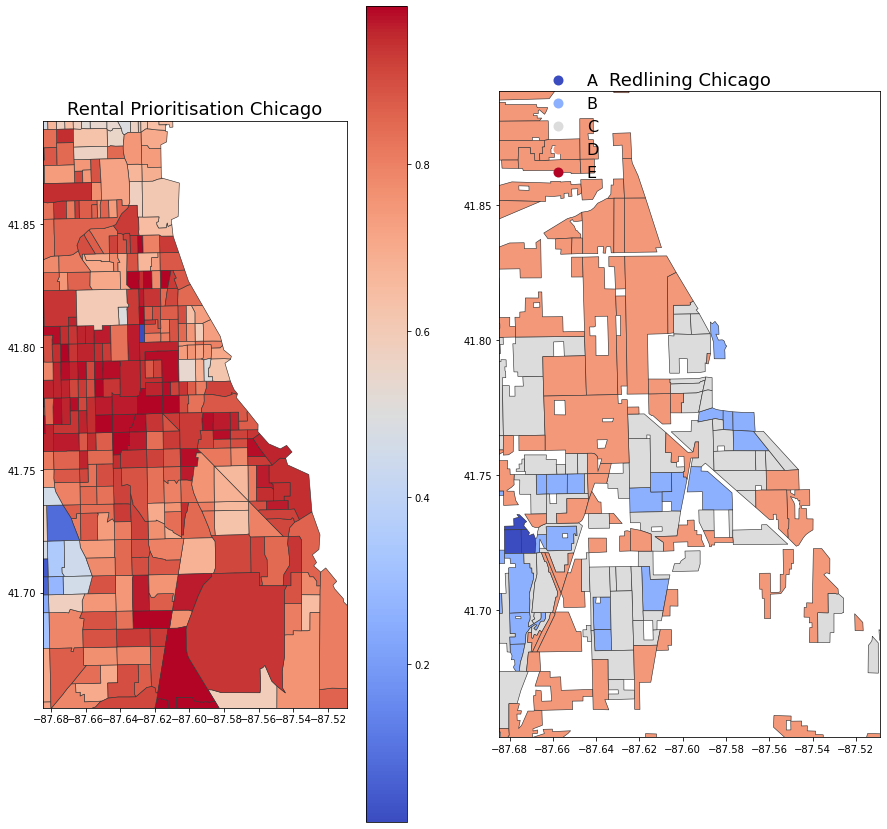

In [ ]:
#Mapping both data for Chicago
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Chicago', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Chicago', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(41.653128, 41.892277)
ax1.set_xlim(-87.684688, -87.508906)

ax2.set_ylim(41.653128, 41.892277)
ax2.set_xlim(-87.684688, -87.508906)


(-83.243609, -82.898913)

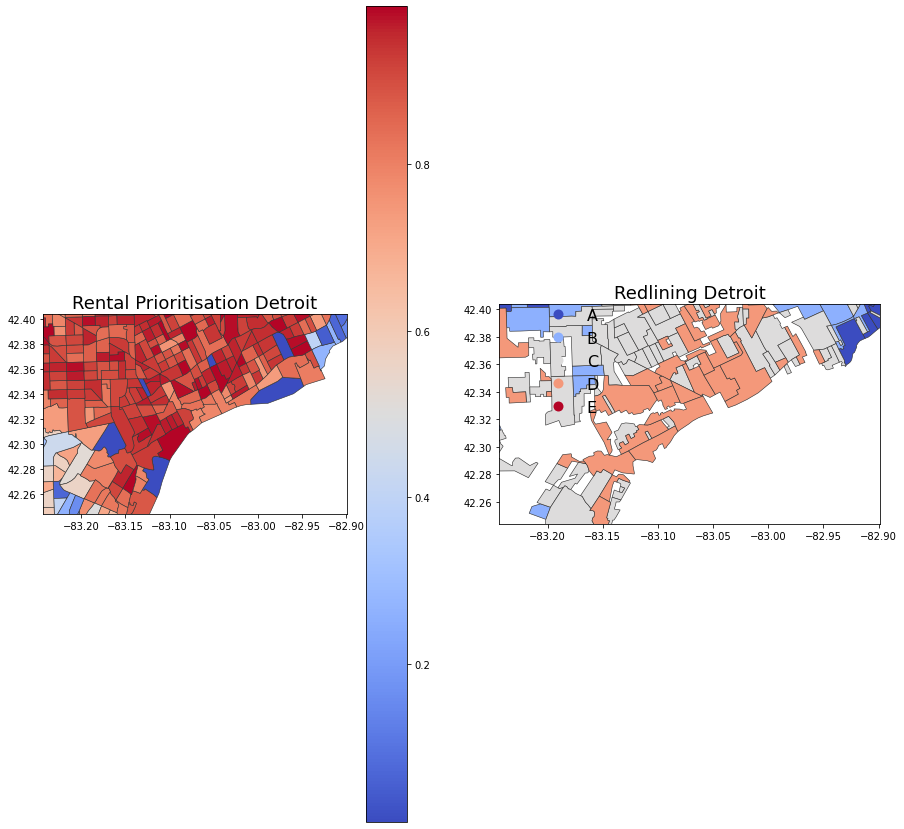

In [ ]:
#Mapping both data for Detroit
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Detroit', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True,  linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Detroit', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(42.244090, 42.403499)
ax1.set_xlim(-83.243609, -82.898913)

ax2.set_ylim(42.244090, 42.403499)
ax2.set_xlim(-83.243609, -82.898913)


(-90.348129, -90.165482)

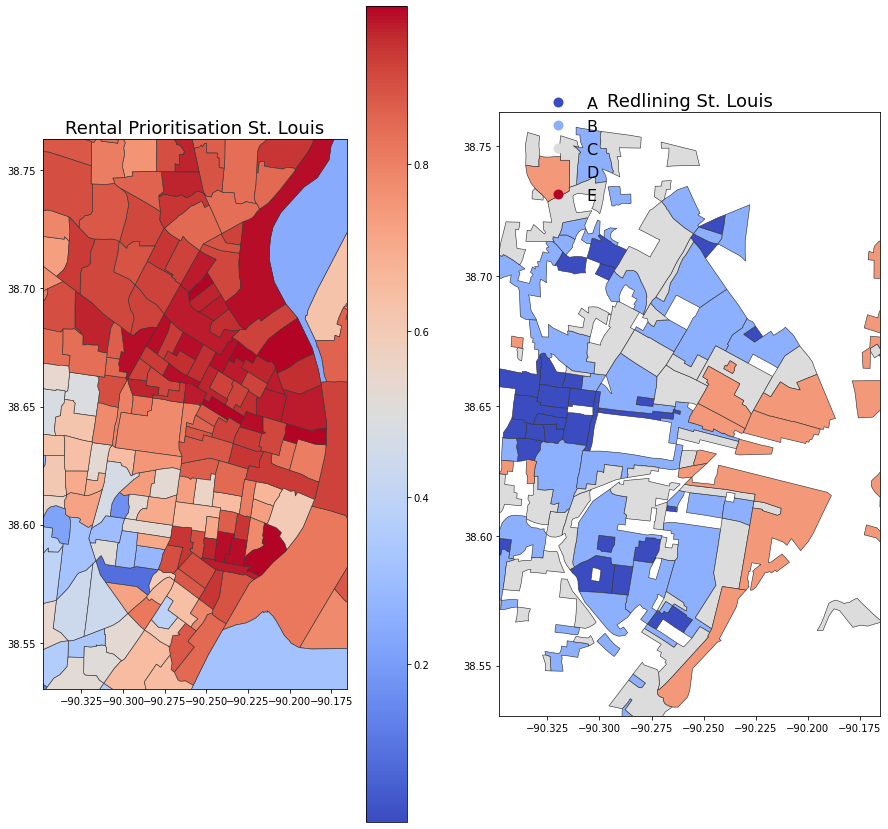

In [ ]:
#Mapping both data for St. Louis
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation St. Louis', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining St. Louis', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(38.530442, 38.763186)
ax1.set_xlim(-90.348129, -90.165482)

ax2.set_ylim(38.530442, 38.763186)
ax2.set_xlim(-90.348129, -90.165482)


(-95.541229, -95.141602)

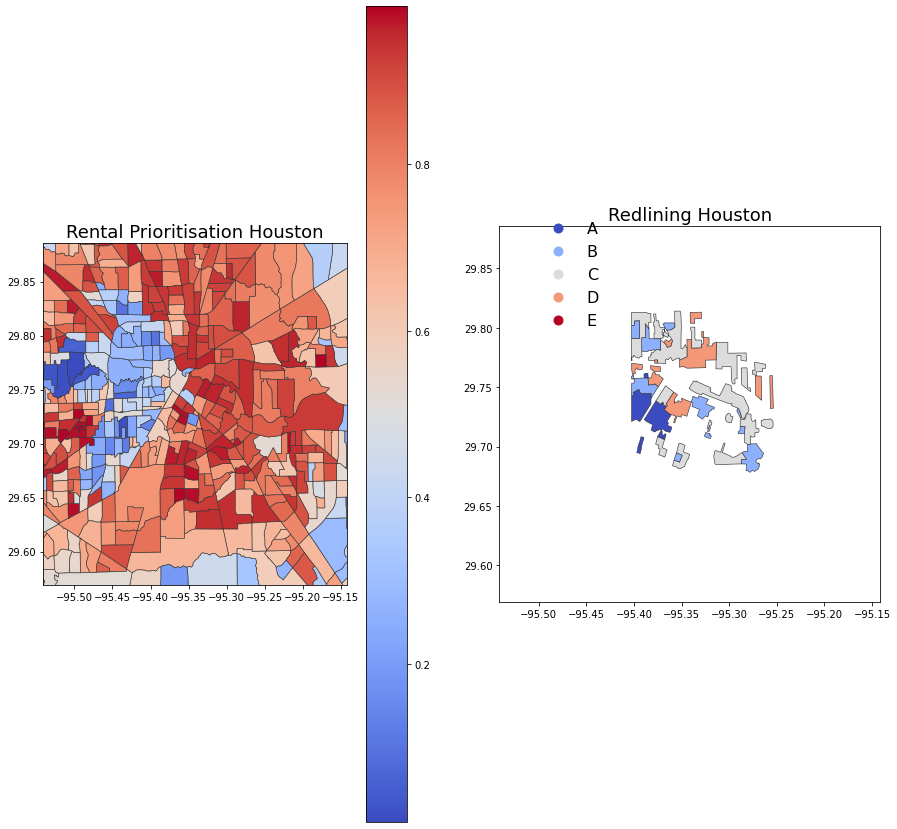

In [ ]:
#Mapping both data for Houston
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Houston', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Houston', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(29.568679, 29.885900)
ax1.set_xlim(-95.541229, -95.141602)

ax2.set_ylim(29.568679, 29.885900)
ax2.set_xlim(-95.541229, -95.141602)


(-96.914445, -96.628801)

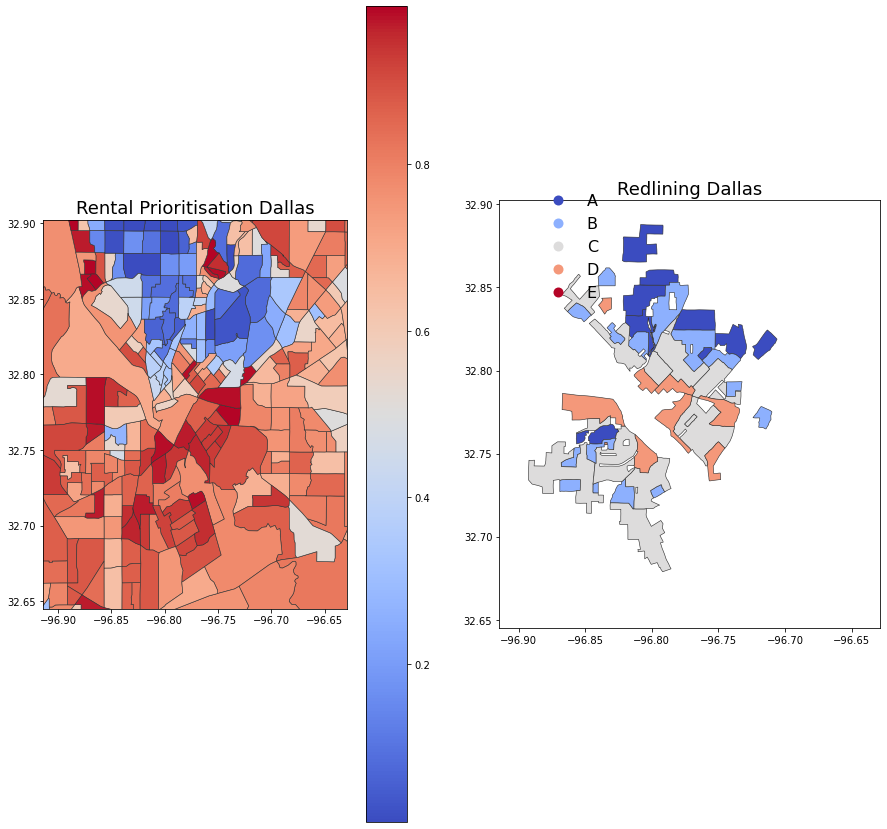

In [ ]:
#Mapping both data for Dallas
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Dallas', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True,linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Dallas', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(32.645012, 32.902506)
ax1.set_xlim(-96.914445, -96.628801)

ax2.set_ylim(32.645012, 32.902506)
ax2.set_xlim(-96.914445, -96.628801)


(-82.562047, -82.383519)

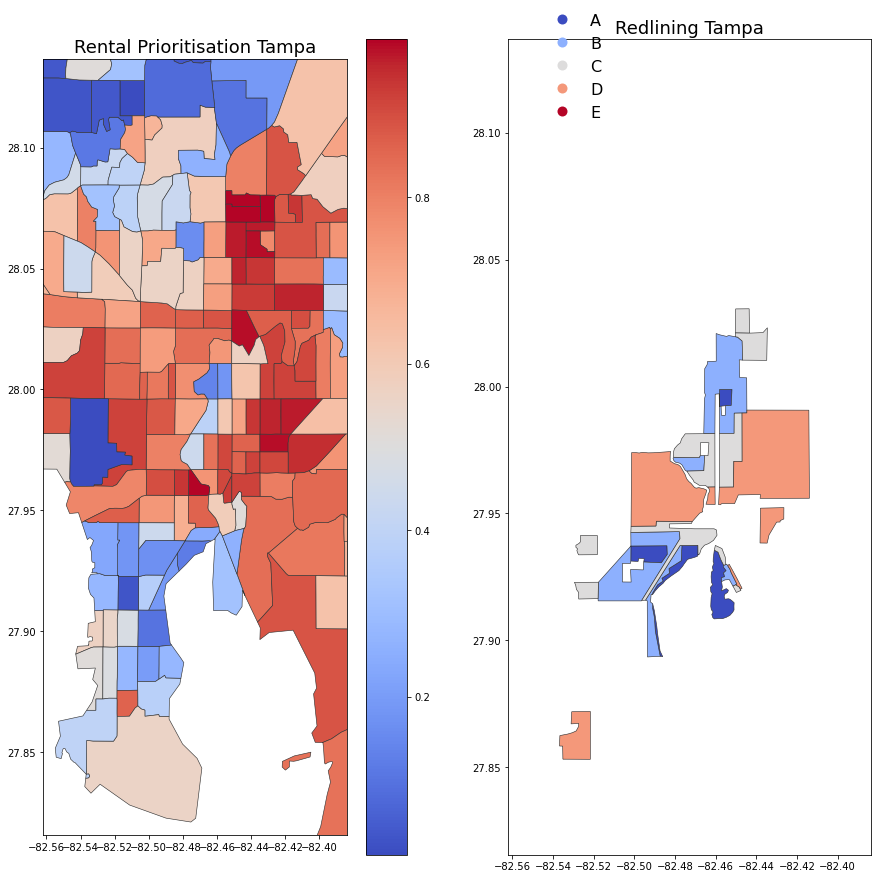

In [ ]:
#Mapping both data for Tampa
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Tampa', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True,linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Tampa', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(27.815432, 28.136826)
ax1.set_xlim(-82.562047, -82.383519)

ax2.set_ylim(27.815432, 28.136826)
ax2.set_xlim(-82.562047, -82.383519)


(-84.570093, -84.353113)

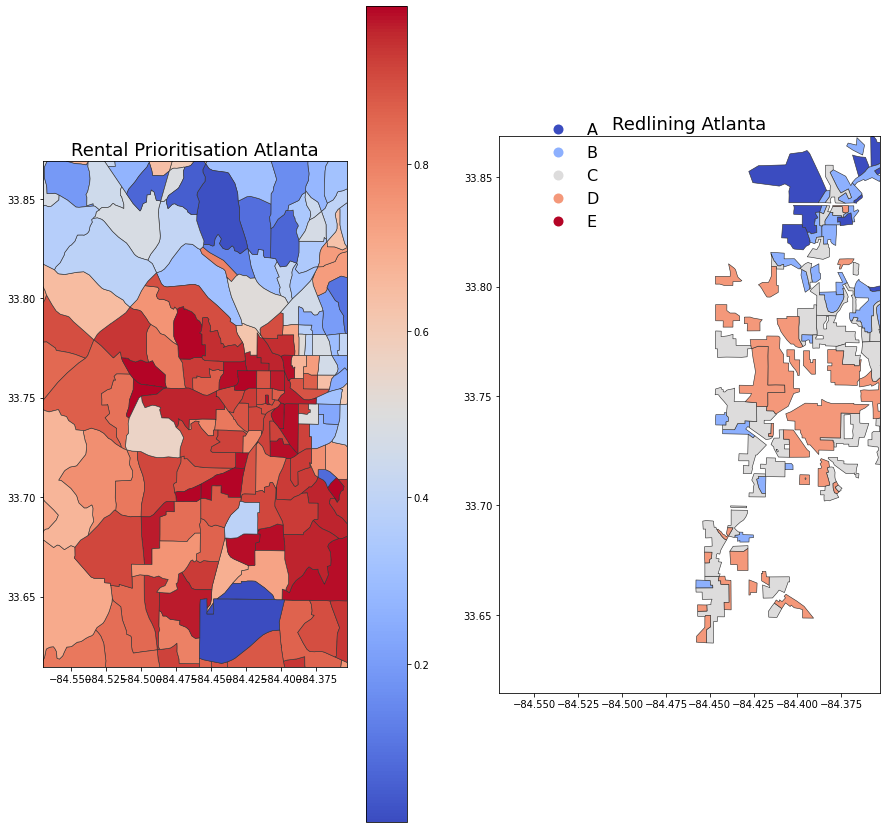

In [ ]:
#Mapping both data for Atlanta
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Atlanta', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True,linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Atlanta', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(33.614400, 33.869057)
ax1.set_xlim(-84.570093, -84.353113)

ax2.set_ylim(33.614400, 33.869057)
ax2.set_xlim(-84.570093, -84.353113)


(-86.875063, -86.682802)

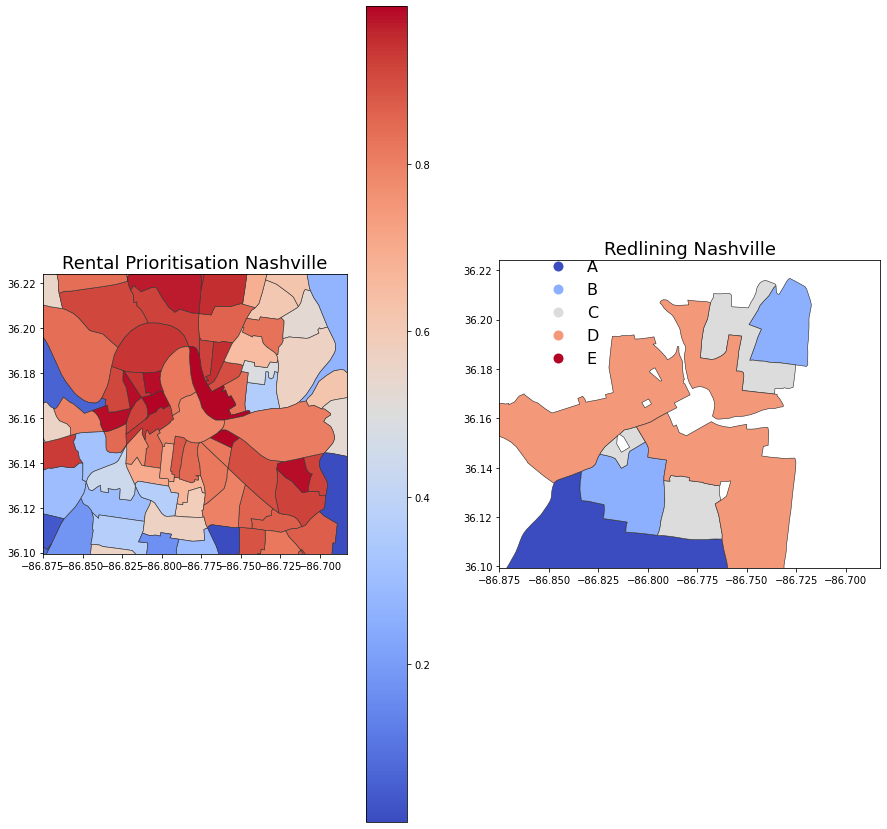

In [ ]:
#Mapping both data for Nashville
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Nashville', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True,linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Redlining Nashville', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(36.099351, 36.224083)
ax1.set_xlim(-86.875063, -86.682802)

ax2.set_ylim(36.099351, 36.224083)
ax2.set_xlim(-86.875063, -86.682802)


(-71.128787, -70.983219)

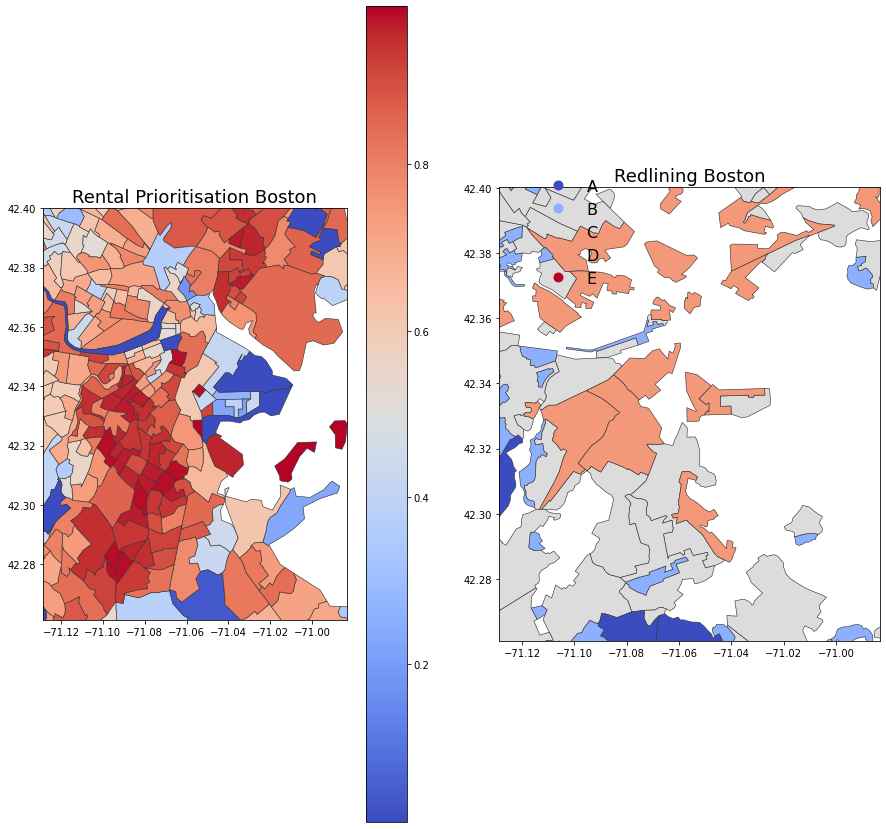

In [ ]:
#Mapping both data for Boston
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Boston', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Redlining Boston', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(42.261061, 42.400148)
ax1.set_xlim(-71.128787,-70.983219)

ax2.set_ylim(42.261061,42.400148)
ax2.set_xlim(-71.128787,-70.983219)

(-74.252472, -74.116516)

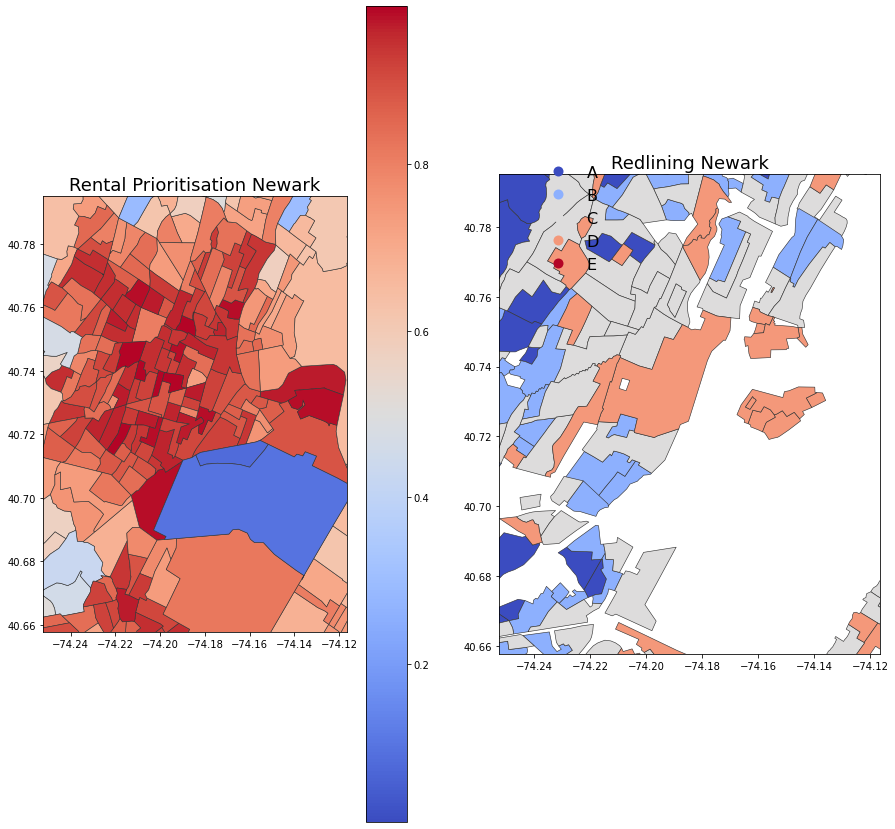

In [ ]:
#Mapping both data for Newark
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Newark', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Newark', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(40.657722, 40.795098)
ax1.set_xlim(-74.252472,-74.116516)

ax2.set_ylim(40.657722,40.795098)
ax2.set_xlim(-74.252472,-74.116516)


(-93.355556, -93.13377)

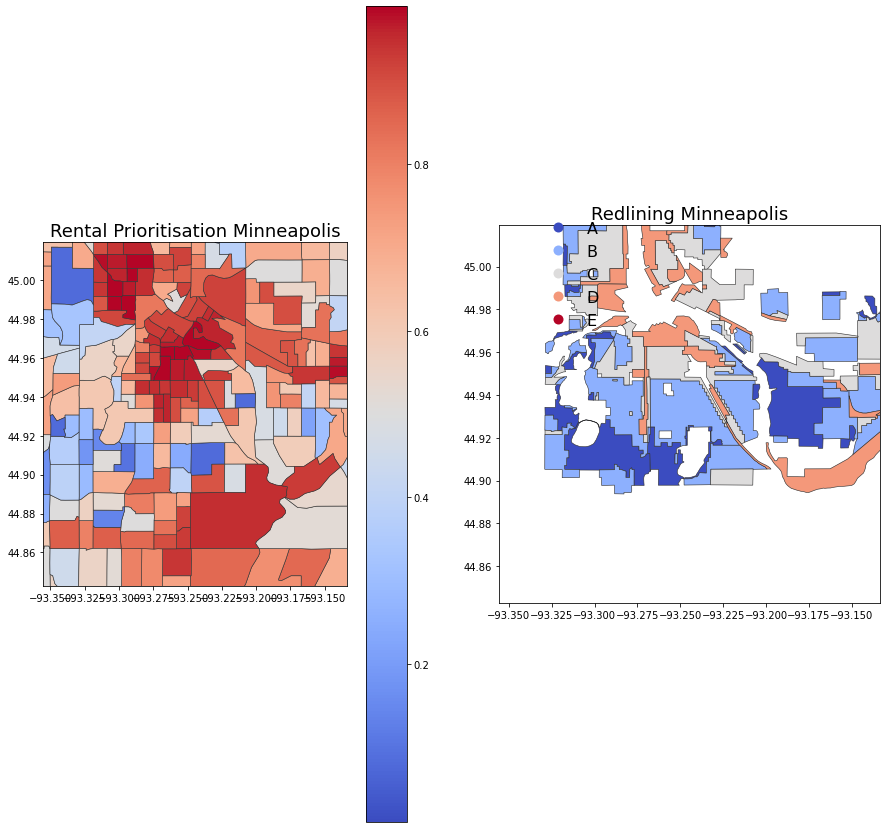

In [ ]:
#Mapping both data for Minneapolis
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Minneapolis', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True,linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Minneapolis', fontsize=18)
redline_data.plot(ax= ax2, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False})

ax1.set_ylim(44.842875, 45.019335)
ax1.set_xlim(-93.355556,-93.133770)

ax2.set_ylim(44.842875,45.019335)
ax2.set_xlim(-93.355556,-93.133770)

## Proportion of minorities across census tracts needing rental assistance

In [ ]:
minorities_data = rent_data[['GEOID','county_name','state_name','perc_person_of_color','geometry']]

(-74.259376, -73.725166)

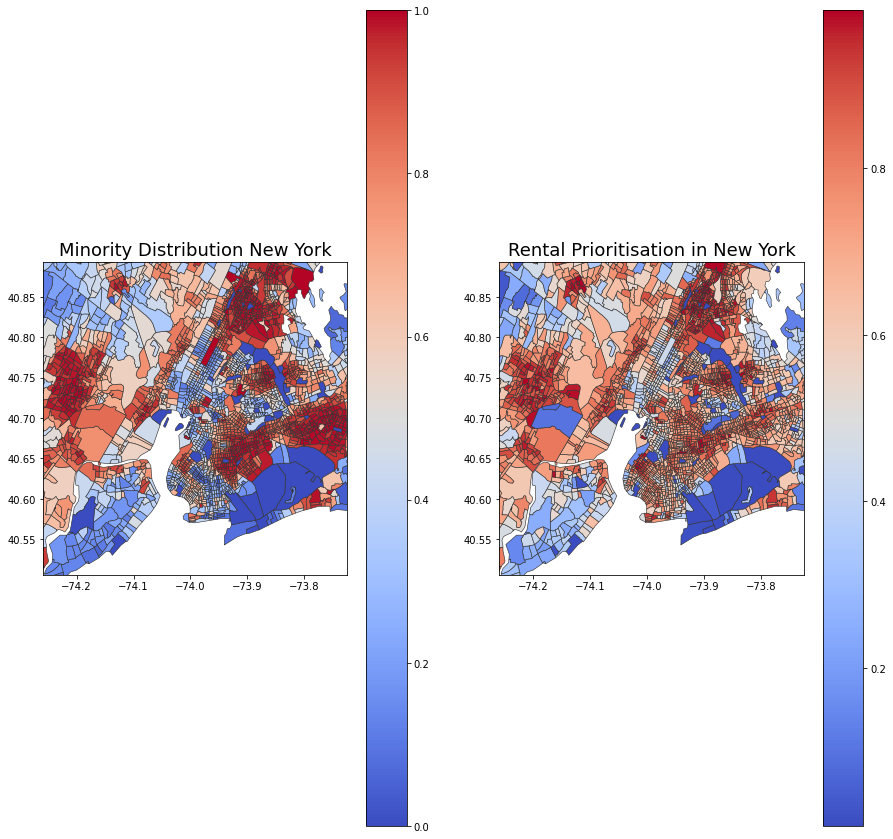

In [ ]:
#Mapping both data for New York City
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution New York', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in New York', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(40.506299, 40.893601)
ax1.set_xlim(-74.259376, -73.725166)

ax2.set_ylim(40.506299, 40.893601)
ax2.set_xlim(-74.259376, -73.725166)

(-118.553885, -118.099326)

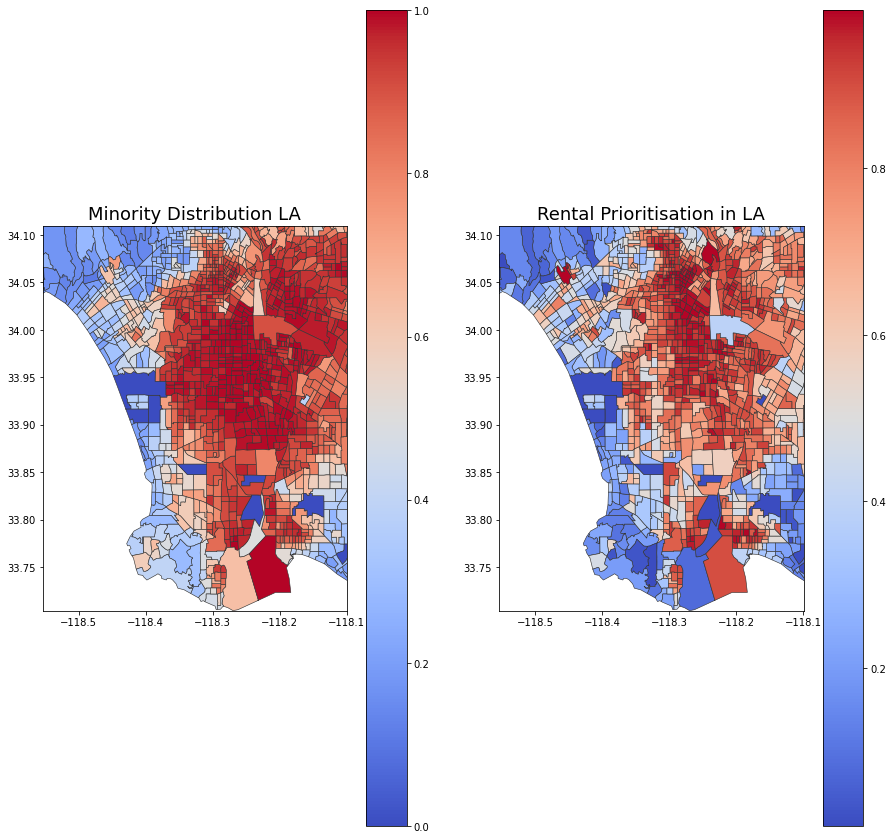

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution LA', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in LA', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(33.703996, 34.109748)
ax1.set_xlim(-118.553885, -118.099326)

ax2.set_ylim(33.703996, 34.109748)
ax2.set_xlim(-118.553885, -118.099326)


(-122.518342, -122.354233)

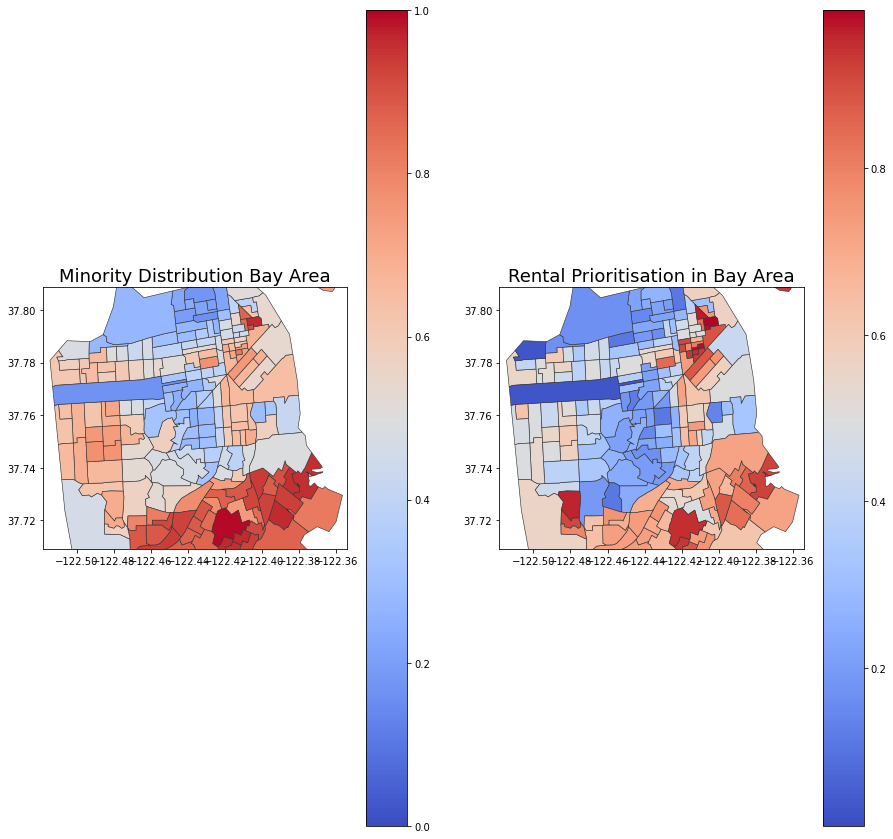

In [ ]:
#Mapping both data for Dallas
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Bay Area', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Bay Area', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(37.709061, 37.808676)
ax1.set_xlim(-122.518342, -122.354233)

ax2.set_ylim(37.709061, 37.808676)
ax2.set_xlim(-122.518342, -122.354233)

(-87.684688, -87.508906)

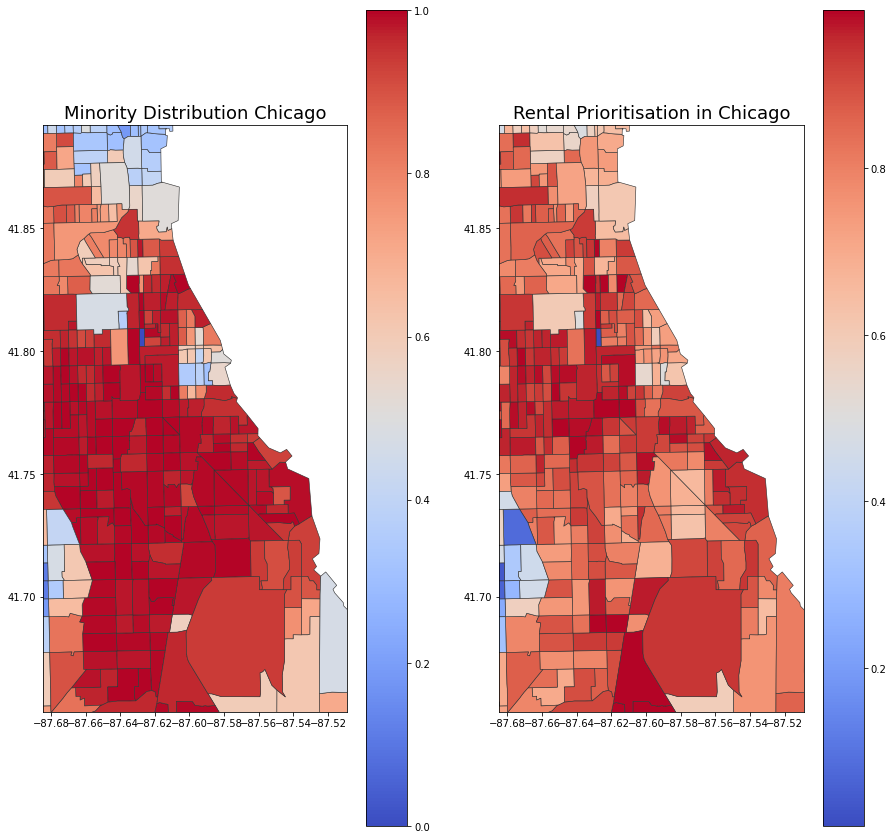

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Chicago', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Chicago', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)


ax1.set_ylim(41.653128, 41.892277)
ax1.set_xlim(-87.684688, -87.508906)

ax2.set_ylim(41.653128, 41.892277)
ax2.set_xlim(-87.684688, -87.508906)

(-83.243609, -82.898913)

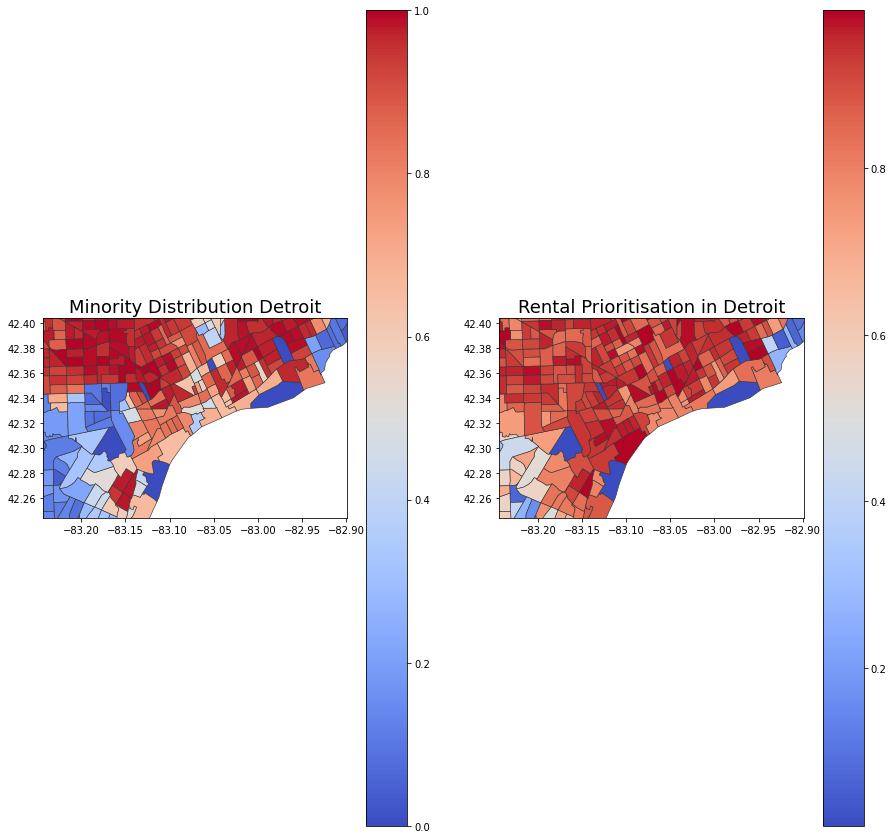

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Detroit', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Detroit', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)


ax1.set_ylim(42.244090, 42.403499)
ax1.set_xlim(-83.243609, -82.898913)

ax2.set_ylim(42.244090, 42.403499)
ax2.set_xlim(-83.243609, -82.898913)

(-90.348129, -90.165482)

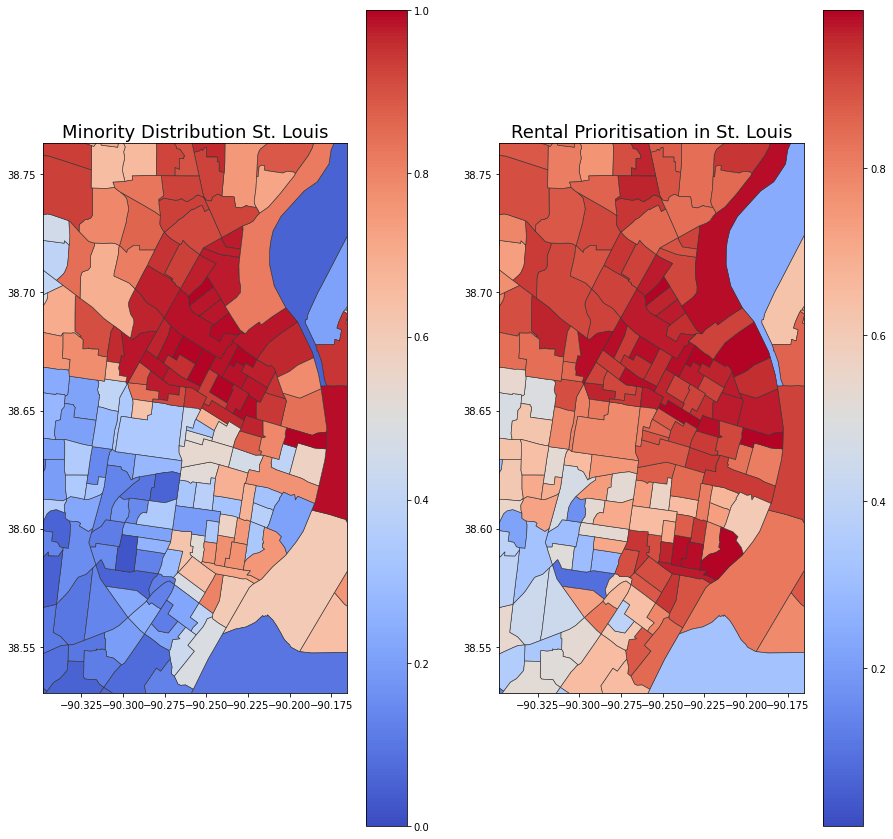

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution St. Louis', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in St. Louis', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(38.530442, 38.763186)
ax1.set_xlim(-90.348129, -90.165482)

ax2.set_ylim(38.530442, 38.763186)
ax2.set_xlim(-90.348129, -90.165482)

(-95.541229, -95.141602)

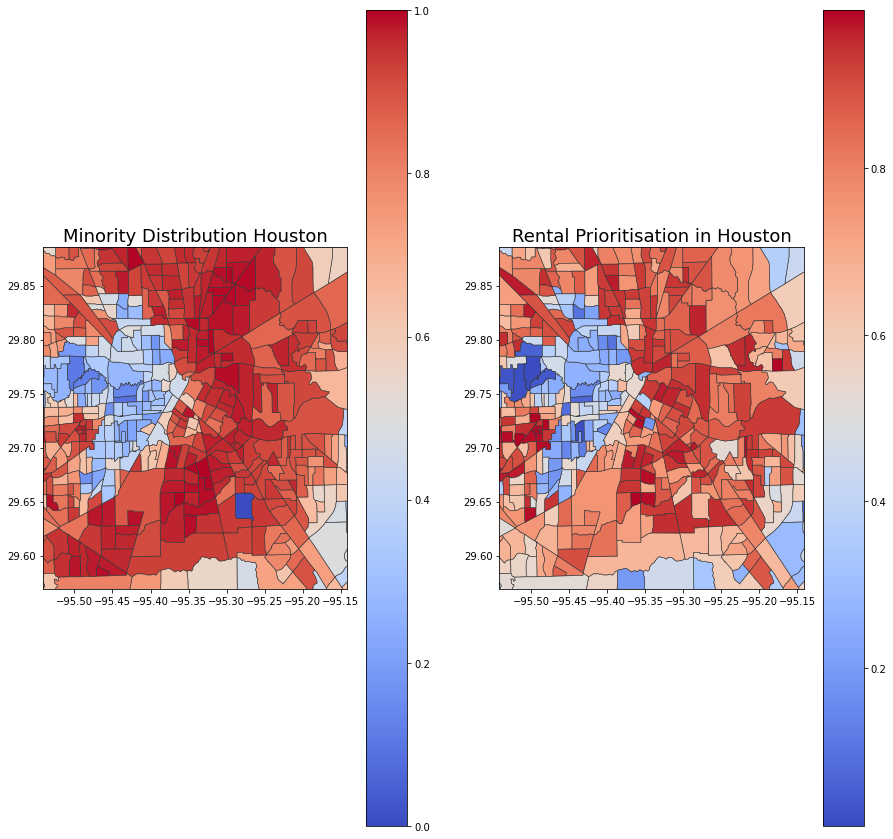

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Houston', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Houston', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(29.568679, 29.885900)
ax1.set_xlim(-95.541229, -95.141602)

ax2.set_ylim(29.568679, 29.885900)
ax2.set_xlim(-95.541229, -95.141602)

(-96.914445, -96.628801)

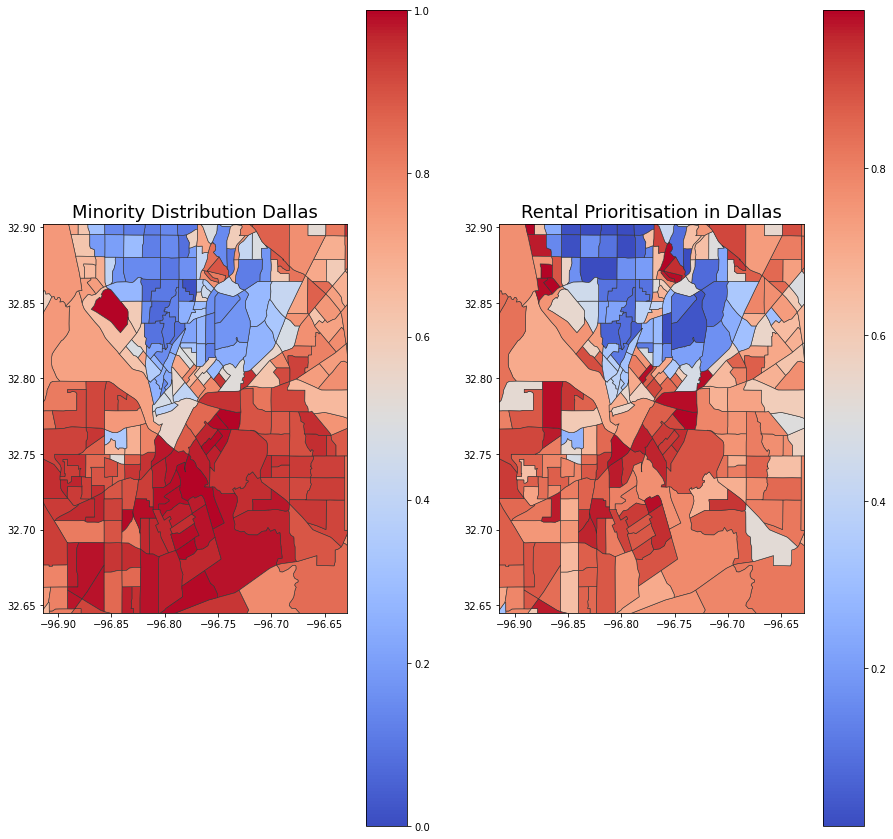

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Dallas', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Dallas', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(32.645012, 32.902506)
ax1.set_xlim(-96.914445, -96.628801)

ax2.set_ylim(32.645012, 32.902506)
ax2.set_xlim(-96.914445, -96.628801)

(-82.562047, -82.383519)

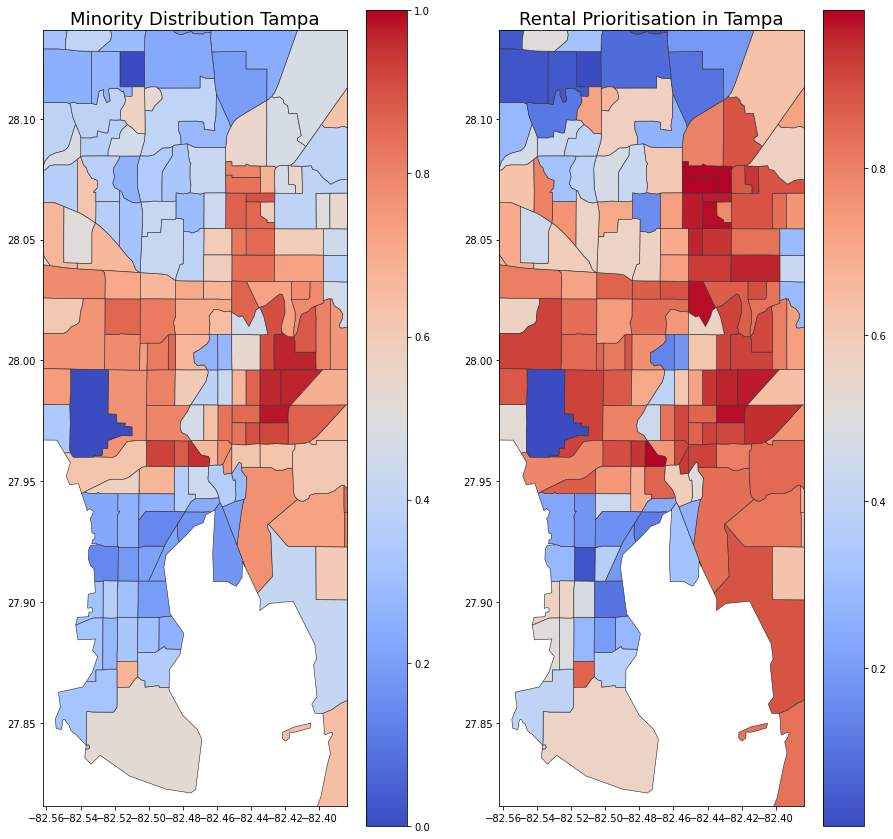

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Tampa', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Tampa', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(27.815432, 28.136826)
ax1.set_xlim(-82.562047, -82.383519)

ax2.set_ylim(27.815432, 28.136826)
ax2.set_xlim(-82.562047, -82.383519)

(-84.570093, -84.353113)

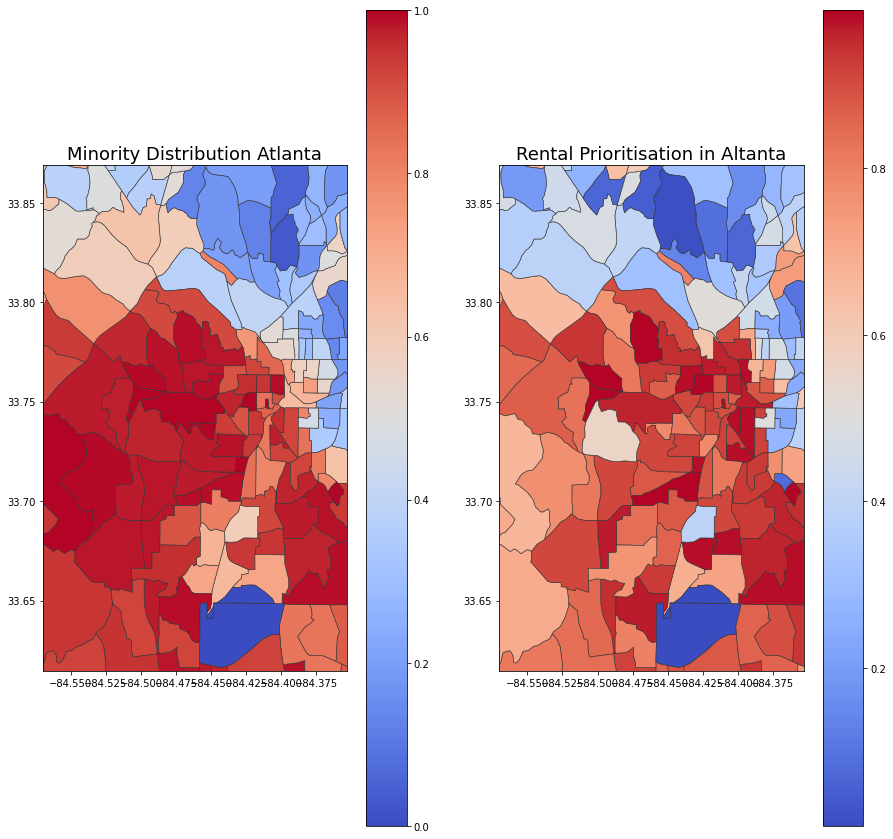

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Atlanta', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Altanta', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(33.614400, 33.869057)
ax1.set_xlim(-84.570093, -84.353113)

ax2.set_ylim(33.614400, 33.869057)
ax2.set_xlim(-84.570093, -84.353113)

(-86.875063, -86.682802)

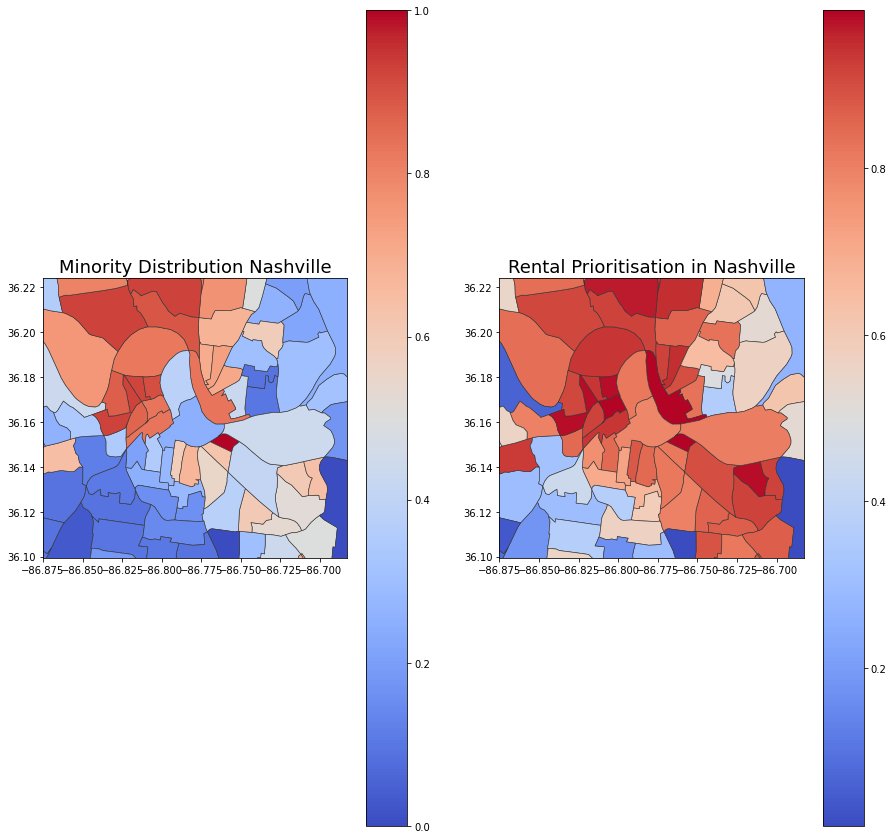

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Nashville', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Nashville', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(36.099351, 36.224083)
ax1.set_xlim(-86.875063, -86.682802)

ax2.set_ylim(36.099351, 36.224083)
ax2.set_xlim(-86.875063, -86.682802)

(-71.128787, -70.983219)

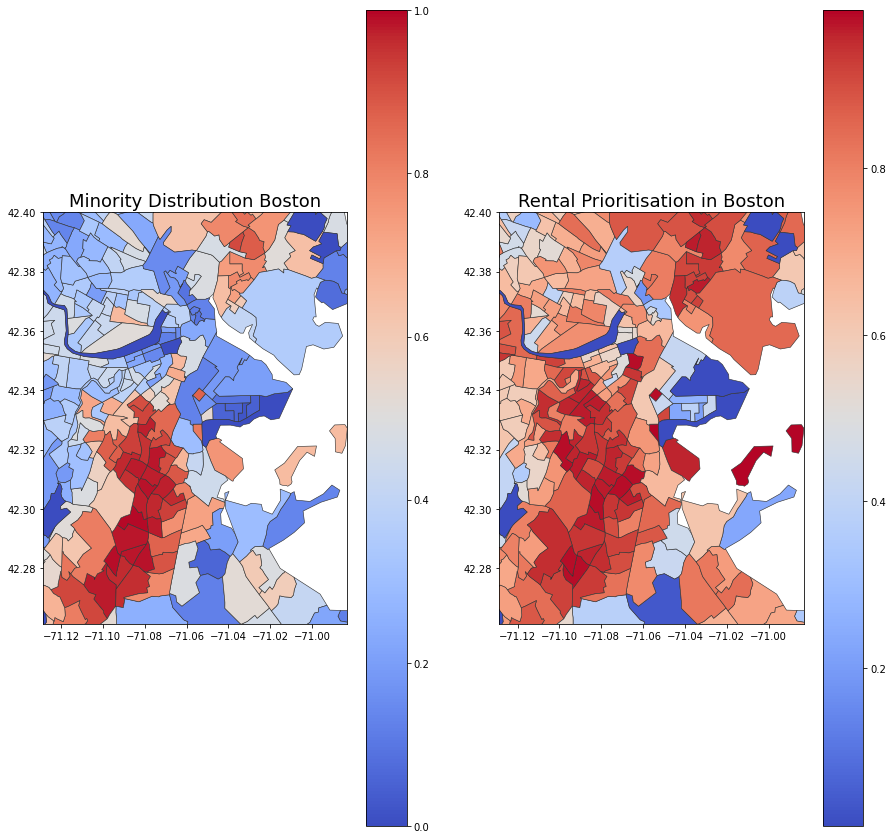

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Boston', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Boston', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(42.261061, 42.400148)
ax1.set_xlim(-71.128787,-70.983219)

ax2.set_ylim(42.261061,42.400148)
ax2.set_xlim(-71.128787,-70.983219)

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Newark', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Newark', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(40.657722, 40.795098)
ax1.set_xlim(-74.252472,-74.116516)

ax2.set_ylim(40.657722,40.795098)
ax2.set_xlim(-74.252472,-74.116516)

(-93.355556, -93.13377)

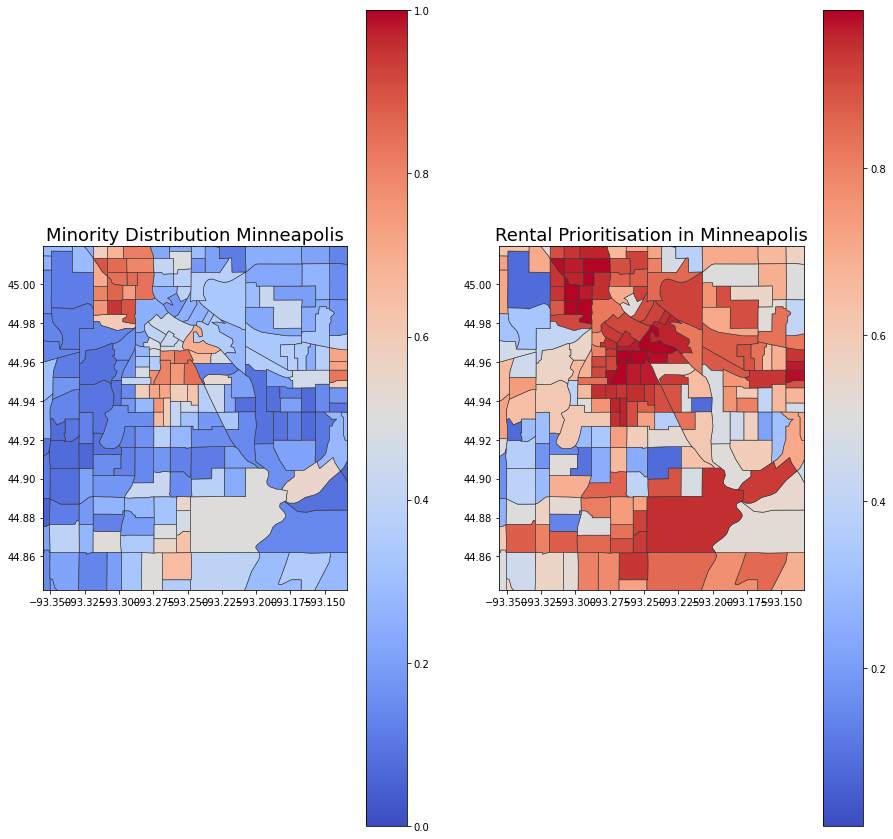

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Minority Distribution Minneapolis', fontsize=18)
minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Rental Prioritisation in Minneapolis', fontsize=18)
rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

ax1.set_ylim(44.842875, 45.019335)
ax1.set_xlim(-93.355556,-93.133770)

ax2.set_ylim(44.842875,45.019335)
ax2.set_xlim(-93.355556,-93.133770)

In [ ]:
def minority_rental_map(y1,y2,x1,x2,city):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

    ax1.set_title('Minority Distribution'+city, fontsize=18)
    minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

    ax2.set_title('Rental Prioritisation in'+city, fontsize=18)
    rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

    ax1.set_ylim(y1, y2)
    ax1.set_xlim(x1,x2)

    ax2.set_ylim(y1,y2)
    ax2.set_xlim(x1,x2)

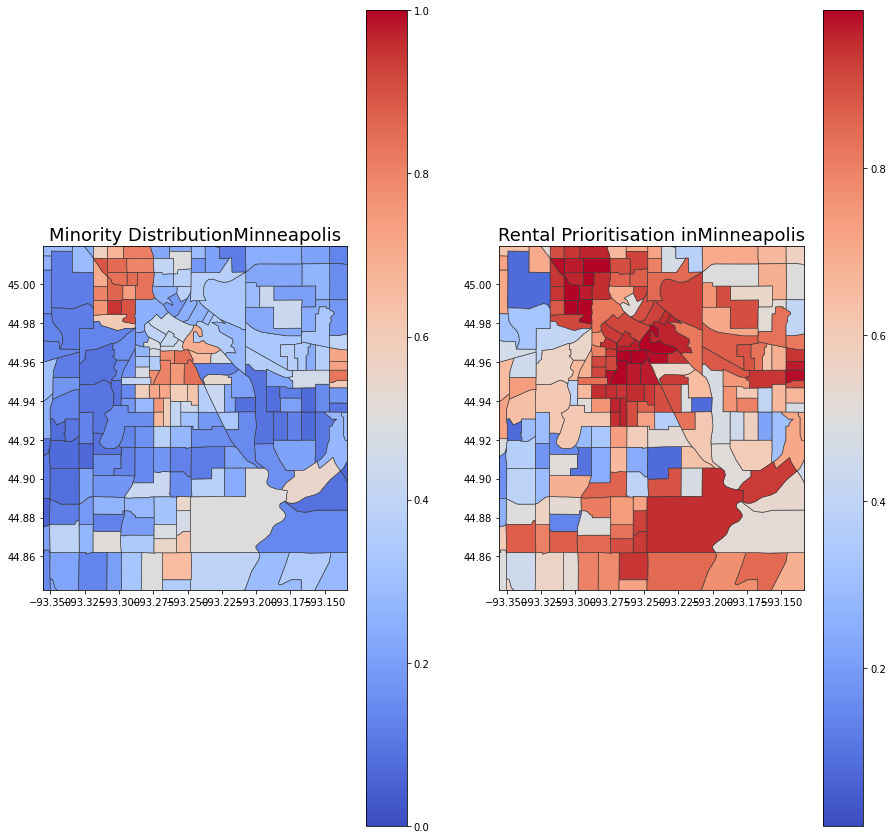

In [ ]:
minority_rental_map(44.842875, 45.019335,-93.355556,-93.133770,'Minneapolis')

## Correlation Values

In [ ]:
#Importing all needed libraries
import pandas as pd
import fiona
from shapely.geometry import shape, mapping
import rtree
import fiona.crs
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import os
import splot
import pysal
from libpysal import weights
import esda
from esda.moran import Moran, Moran_Local,Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv, plot_local_autocorrelation, moran_scatterplot

In [ ]:
#NY Racial Minority and Rental Assistance Correlation
ny_counties = ['Kings County','Richmond County', 'Bronx County', ' Queens County', 'New York County']
ny = rent_data[rent_data['county_name'].isin(ny_counties)]

t=['36061000100']
ny = ny.loc[~ny.GEOID.isin(t)]

y = ny['perc_person_of_color'].values
w = Queen.from_dataframe(ny)
w.transform = 'R'
x = ny['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)


0.5623506138542057

In [ ]:
#LA Racial Minority and Rental Assistance Correlation

la_counties = ['Los Angeles County']

la = rent_data[rent_data['county_name'].isin(la_counties)]

y = la['perc_person_of_color'].values
w = Queen.from_dataframe(la)
w.transform = 'R'
x = la['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.6387818439294433

In [ ]:
#SF Racial Minority and Rental Assistance Correlation

sf_counties = ['San Francisco County']

sf = rent_data[rent_data['county_name'].isin(sf_counties)]

t=['06075980401']
sf = sf.loc[~sf.GEOID.isin(t)]

y = sf['perc_person_of_color'].values
w = Queen.from_dataframe(sf)
w.transform = 'R'
x = sf['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.631767939424047

In [ ]:
#Chicago Racial Minority and Rental Assistance Correlation

chicago_counties = ['Cook County']

chicago = rent_data[(rent_data['county_name'].isin(chicago_counties))&(rent_data['state_name']=='Illinois')]

y = chicago['perc_person_of_color'].values
w = Queen.from_dataframe(chicago)
w.transform = 'R'
x = chicago['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.6969169750605307

In [ ]:
#Detroit Racial Minority and Rental Assistance Correlation

detroit_counties = ['Wayne County']

detroit = rent_data[(rent_data['county_name'].isin(detroit_counties))&(rent_data['state_name']=='Michigan')]

y = detroit['perc_person_of_color'].values
w = Queen.from_dataframe(detroit)
w.transform = 'R'
x = detroit['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.6576343583793708

In [ ]:
#St. Louis Racial Minority and Rental Assistance Correlation

sl_counties = ['St. Louis County']

sl = rent_data[rent_data['county_name'].isin(sl_counties)]

y = sl['perc_person_of_color'].values
w = Queen.from_dataframe(sl)
w.transform = 'R'
x = sl['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.6227416955258457

In [ ]:
#Houston Racial Minority and Rental Assistance Correlation

houston_counties = ['Harris County']

houston = rent_data[(rent_data['county_name'].isin(houston_counties))&(rent_data['state_name']=='Texas')]

y = houston['perc_person_of_color'].values
w = Queen.from_dataframe(houston)
w.transform = 'R'
x = houston['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.6707041158599524

In [ ]:
#Dallas Racial Minority and Rental Assistance Correlation

dallas_counties = ['Dallas County']

dallas = rent_data[(rent_data['county_name'].isin(dallas_counties))&(rent_data['state_name']=='Texas')]

y = dallas['perc_person_of_color'].values
w = Queen.from_dataframe(dallas)
w.transform = 'R'
x = dallas['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.55787523963193

In [ ]:
#Atlanta Racial Minority and Rental Assistance Correlation

atlanta_counties = ['Fulton County']

atlanta = rent_data[(rent_data['county_name'].isin(atlanta_counties))&(rent_data['state_name']=='Georgia')]

t=['12057980200']
atlanta = atlanta.loc[~atlanta.GEOID.isin(t)]

y = atlanta['perc_person_of_color'].values
w = Queen.from_dataframe(atlanta)
w.transform = 'R'
x = atlanta['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.6931011231593155

In [ ]:
#Nashville Racial Minority and Rental Assistance Correlation

nashville_counties = ['Davidson County']

nashville = rent_data[(rent_data['county_name'].isin(nashville_counties))&(rent_data['state_name']=='Tennessee')]

y = nashville['perc_person_of_color'].values
w = Queen.from_dataframe(nashville)
w.transform = 'R'
x = nashville['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.47659934615671695

In [ ]:
#Boston Racial Minority and Rental Assistance Correlation

boston_counties = ['Suffolk County']

boston = rent_data[(rent_data['county_name'].isin(boston_counties))&(rent_data['state_name']=='Massachusetts')]

y = boston['perc_person_of_color'].values
w = Queen.from_dataframe(boston)
w.transform = 'R'
x = boston['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.5022338005674643

In [ ]:
#Newark Racial Minority and Rental Assistance Correlation

newark_counties = ['Essex County']

newark = rent_data[(rent_data['county_name'].isin(newark_counties))&(rent_data['state_name']=='New Jersey')]

y = newark['perc_person_of_color'].values
w = Queen.from_dataframe(newark)
w.transform = 'R'
x = newark['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.8346793619143605

In [ ]:
#Minneapolis Racial Minority and Rental Assistance Correlation

minneapolis_counties = ['Hennepin County']

minneapolis = rent_data[rent_data['county_name'].isin(minneapolis_counties)]

y = minneapolis['perc_person_of_color'].values
w = Queen.from_dataframe(minneapolis)
w.transform = 'R'
x = minneapolis['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.5576595162681809

In [ ]:
def correlation_racial_rental(counties,state_name=None,t=None):
    county = rent_data[(rent_data['county_name'].isin(counties))]
    if(state_name!=None):
        county = county[(county['state_name']==state_name)]
    if(t!=None):
        county = county.loc[~county.GEOID.isin(t)]
    y = county['perc_person_of_color'].values
    w = Queen.from_dataframe(county)
    w.transform = 'R'
    x = county['total_index_quantile'].values
    moran = Moran(y,w)
    moran_loc = Moran_Local(y, w)
    moran_bv = Moran_BV(y, x, w)
    moran_loc_bv = Moran_Local_BV(y, x, w)
    return(moran_bv.I)

In [ ]:
correlation_racial_rental(['Hennepin County'])

0.5576595162681809

## Plotting Rental Assistance vs Ordinal Redline Index

In [ ]:
#California Data
cali_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/california/cali_redlined_numerical_values.geojson')
cali_redline.head()

STATEFP COUNTYFP TRACTCE         GEOID  NAME           NAMELSAD  MTFCC  \
0      06      037  143400  6.037143e+09  1434  Census Tract 1434  G5020   
1      06      037  143500  6.037144e+09  1435  Census Tract 1435  G5020   
2      06      037  181000  6.037181e+09  1810  Census Tract 1810  G5020   
3      06      037  181500  6.037182e+09  1815  Census Tract 1815  G5020   
4      06      037  181600  6.037182e+09  1816  Census Tract 1816  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  1738504   18831  +34.1538507  -118.4110998   
1        S  1191719   46468  +34.1476412  -118.4067800   
2        S  4107041   30513  +34.1452670  -118.2043861   
3        S  1094424       0  +34.1347812  -118.1928513   
4        S  1250035       0  +34.1297233  -118.2097405   

   reweighted_redline_index  ordinal_value  \
0                  1.881208              2   
1                  2.037389              3   
2                  0.777639              1   
3                  2.940550              3   
4                  3.000000              3   

                                            geometry  
0  POLYGON ((-118.42250 34.15653, -118.42224 34.1...  
1  POLYGON ((-118.42250 34.14956, -118.42250 34.1...  
2  POLYGON ((-118.22860 34.14689, -118.22852 34.1...  
3  POLYGON ((-118.20153 34.13351, -118.20151 34.1...  
4  POLYGON ((-118.21828 34.13188, -118.21813 34.1...

In [ ]:
#NY Data
ny_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/new york/ny shapefiles/ny redlining/ny_redlined_numerical_values.geojson')
ny_redline.head()

DriverError: /home/jovyan/work/COVIDRedlining/data/new york/ny shapefiles/ny redlining/ny_redlined_numerical_values.geojson: No such file or directory

In [ ]:
#Chicago Data
chicago_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/chicago/chicago_redlined_numerical_values.geojson')
chicago_redline.head()

STATEFP COUNTYFP TRACTCE         GEOID  NAME           NAMELSAD  MTFCC  \
0      17      031  010300  1.703101e+10   103   Census Tract 103  G5020   
1      17      031  010400  1.703101e+10   104   Census Tract 104  G5020   
2      17      031  010600  1.703101e+10   106   Census Tract 106  G5020   
3      17      031  020100  1.703102e+10   201   Census Tract 201  G5020   
4      17      031  280800  1.703128e+10  2808  Census Tract 2808  G5020   

  FUNCSTAT   ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  472017       0  +42.0159407  -087.6665351   
1        S  548761  602605  +42.0064109  -087.6588157   
2        S  495017       0  +42.0062774  -087.6676830   
3        S  411155       0  +42.0157210  -087.6871169   
4        S  237357       0  +41.8785967  -087.6889009   

   reweighted_redline_index  ordinal_value  \
0                  2.870394              3   
1                  2.520992              3   
2                  2.947336              3   
3                  2.007798              3   
4                  4.000000              4   

                                            geometry  
0  POLYGON ((-87.67133 42.01937, -87.67121 42.019...  
1  POLYGON ((-87.66345 42.01283, -87.66321 42.012...  
2  POLYGON ((-87.67059 42.00537, -87.67046 42.005...  
3  POLYGON ((-87.69025 42.01264, -87.69024 42.012...  
4  POLYGON ((-87.69151 41.88111, -87.69147 41.881...

In [ ]:
#Dallas Data
dallas_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/dallas/dallas_redlined_numerical_values.geojson')
dallas_redline.head()

STATEFP COUNTYFP TRACTCE         GEOID   NAME            NAMELSAD  MTFCC  \
0      48      113  980100  4.811398e+10   9801   Census Tract 9801  G5020   
1      48      113  000605  4.811300e+10   6.05   Census Tract 6.05  G5020   
2      48      113  007101  4.811301e+10  71.01  Census Tract 71.01  G5020   
3      48      113  004201  4.811300e+10  42.01  Census Tract 42.01  G5020   
4      48      113  005901  4.811301e+10  59.01  Census Tract 59.01  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  5493433       0  +32.8455619  -096.8494250   
1        S   537957       0  +32.8104817  -096.8071671   
2        S  1180246       0  +32.8443119  -096.8175334   
3        S  2569176    9714  +32.7584519  -096.8299088   
4        S  2898961       0  +32.6930920  -096.8082157   

   reweighted_redline_index  ordinal_value  \
0                  3.095023              4   
1                  2.086960              3   
2                  1.000000              1   
3                  2.158202              3   
4                  3.000000              3   

                                            geometry  
0  POLYGON ((-96.86907 32.84576, -96.86893 32.846...  
1  POLYGON ((-96.81350 32.81280, -96.81263 32.813...  
2  POLYGON ((-96.82198 32.83702, -96.82187 32.837...  
3  POLYGON ((-96.83757 32.75015, -96.83756 32.750...  
4  POLYGON ((-96.81470 32.69375, -96.81467 32.695...

In [ ]:
#Detroit Data
detroit_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/detroit/detroit_redlined_numerical_values.geojson')
detroit_redline.head()

STATEFP COUNTYFP TRACTCE         GEOID  NAME           NAMELSAD  MTFCC  \
0      26      163  550800  2.616355e+10  5508  Census Tract 5508  G5020   
1      26      163  550900  2.616355e+10  5509  Census Tract 5509  G5020   
2      26      163  551100  2.616355e+10  5511  Census Tract 5511  G5020   
3      26      163  551200  2.616355e+10  5512  Census Tract 5512  G5020   
4      26      163  551300  2.616355e+10  5513  Census Tract 5513  G5020   

  FUNCSTAT    ALAND   AWATER     INTPTLAT      INTPTLON  \
0        S  2278948   930352  +42.4169429  -082.8975897   
1        S  2492682  1655800  +42.4342045  -082.8771963   
2        S  4008817        0  +42.4316457  -082.8970265   
3        S  1495415        0  +42.4317539  -082.9126087   
4        S  1661735        0  +42.4352821  -082.9181837   

   reweighted_redline_index  ordinal_value  \
0                  1.456514              2   
1                  1.000000              2   
2                  1.037490              2   
3                  1.764541              2   
4                  3.000000              3   

                                            geometry  
0  POLYGON ((-82.91063 42.41719, -82.91055 42.417...  
1  POLYGON ((-82.88940 42.41998, -82.88884 42.421...  
2  POLYGON ((-82.90970 42.42685, -82.90958 42.427...  
3  POLYGON ((-82.92277 42.43218, -82.92252 42.432...  
4  POLYGON ((-82.92766 42.42606, -82.92748 42.426...

In [ ]:
#Minneapolis Data
minneapolis_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/minneapolis/minneapolis_redlined_numerical_values.geojson')
minneapolis_redline.head()

STATEFP COUNTYFP TRACTCE         GEOID  NAME           NAMELSAD  MTFCC  \
0      27      053  110000  2.705311e+10  1100  Census Tract 1100  G5020   
1      27      053  105600  2.705311e+10  1056  Census Tract 1056  G5020   
2      27      053  002700  2.705300e+10    27    Census Tract 27  G5020   
3      27      053  102500  2.705310e+10  1025  Census Tract 1025  G5020   
4      27      053  108600  2.705311e+10  1086  Census Tract 1086  G5020   

  FUNCSTAT   ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  447625       0  +44.9304996  -093.2710511   
1        S  479940       0  +44.9654137  -093.2831367   
2        S  653720       0  +44.9951695  -093.3133431   
3        S  949074       0  +45.0029873  -093.2534279   
4        S  671025       0  +44.9433141  -093.2459630   

   reweighted_redline_index  ordinal_value  \
0                  3.156713              4   
1                  2.213908              3   
2                  2.366482              3   
3                  3.170737              4   
4                  2.173822              3   

                                            geometry  
0  POLYGON ((-93.27456 44.92737, -93.27454 44.930...  
1  POLYGON ((-93.28825 44.96759, -93.28823 44.967...  
2  POLYGON ((-93.31847 44.99341, -93.31847 44.995...  
3  POLYGON ((-93.26023 45.00308, -93.26025 45.005...  
4  POLYGON ((-93.24995 44.94656, -93.24995 44.948...

In [ ]:
#Newark Data
newark_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/newark/newark_redlined_numerical_values.geojson')
newark_redline.head()

STATEFP COUNTYFP TRACTCE         GEOID     NAME              NAMELSAD  \
0      34      031  246300  3.403125e+10     2463     Census Tract 2463   
1      34      031  124402  3.403112e+10  1244.02  Census Tract 1244.02   
2      34      031  124312  3.403112e+10  1243.12  Census Tract 1243.12   
3      34      031  124322  3.403112e+10  1243.22  Census Tract 1243.22   
4      34      013  020902  3.401302e+10   209.02   Census Tract 209.02   

   MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  G5020        S  10100083  480508  +40.9104210  -074.2642143   
1  G5020        S   3614514  151322  +40.8313394  -074.1354192   
2  G5020        S   2650218   13035  +40.8589269  -074.1865351   
3  G5020        S   2371061    1700  +40.8468564  -074.1639982   
4  G5020        S   9369925   63571  +40.8217373  -074.3101465   

   reweighted_redline_index  ordinal_value  \
0                  2.000000              2   
1                  3.000000              4   
2                  1.093636              2   
3                  2.172955              3   
4                  1.982339              2   

                                            geometry  
0  POLYGON ((-74.28932 40.92851, -74.28932 40.928...  
1  POLYGON ((-74.15121 40.83169, -74.15059 40.832...  
2  POLYGON ((-74.19787 40.85705, -74.19777 40.857...  
3  POLYGON ((-74.17937 40.84705, -74.17933 40.847...  
4  POLYGON ((-74.33494 40.82758, -74.33493 40.827...

In [ ]:
#Tampa Data
tampa_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/tampa/tampa_redlined_numerical_values.geojson')
tampa_redline.head()

STATEFP COUNTYFP TRACTCE         GEOID NAME         NAMELSAD  MTFCC  \
0      12      057  001100  1.205700e+10   11  Census Tract 11  G5020   
1      12      057  001200  1.205700e+10   12  Census Tract 12  G5020   
2      12      057  004300  1.205700e+10   43  Census Tract 43  G5020   
3      12      057  001400  1.205700e+10   14  Census Tract 14  G5020   
4      12      057  001500  1.205700e+10   15  Census Tract 15  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  1631653   45399  +28.0140191  -082.4461143   
1        S  1363104   35703  +28.0156612  -082.4586636   
2        S   748979  143520  +27.9602984  -082.4711251   
3        S  2352954   84840  +28.0037546  -082.4772015   
4        S  1465646   85703  +28.0027970  -082.4655029   

   reweighted_redline_index  ordinal_value  \
0                  2.699669              3   
1                  2.000000              2   
2                  4.000000              4   
3                  2.000000              2   
4                  2.000000              2   

                                            geometry  
0  POLYGON ((-82.45131 28.01158, -82.45130 28.012...  
1  POLYGON ((-82.46488 28.01201, -82.46484 28.012...  
2  POLYGON ((-82.47671 27.95639, -82.47670 27.957...  
3  POLYGON ((-82.48441 27.99684, -82.48439 27.997...  
4  POLYGON ((-82.47372 28.00234, -82.47359 28.003...

In [ ]:
def rental_redline_map(y1,y2,x1,x2,city,state_redline):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

    ax1.set_title('Rental Prioritisation'+city, fontsize=18)
    rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

    ax2.set_title('Redline Index', fontsize=18)
    state_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

    ax1.set_ylim(y1,y2)
    ax1.set_xlim(x1,x2)

    ax2.set_ylim(y1,y2)
    ax2.set_xlim(x1,x2)


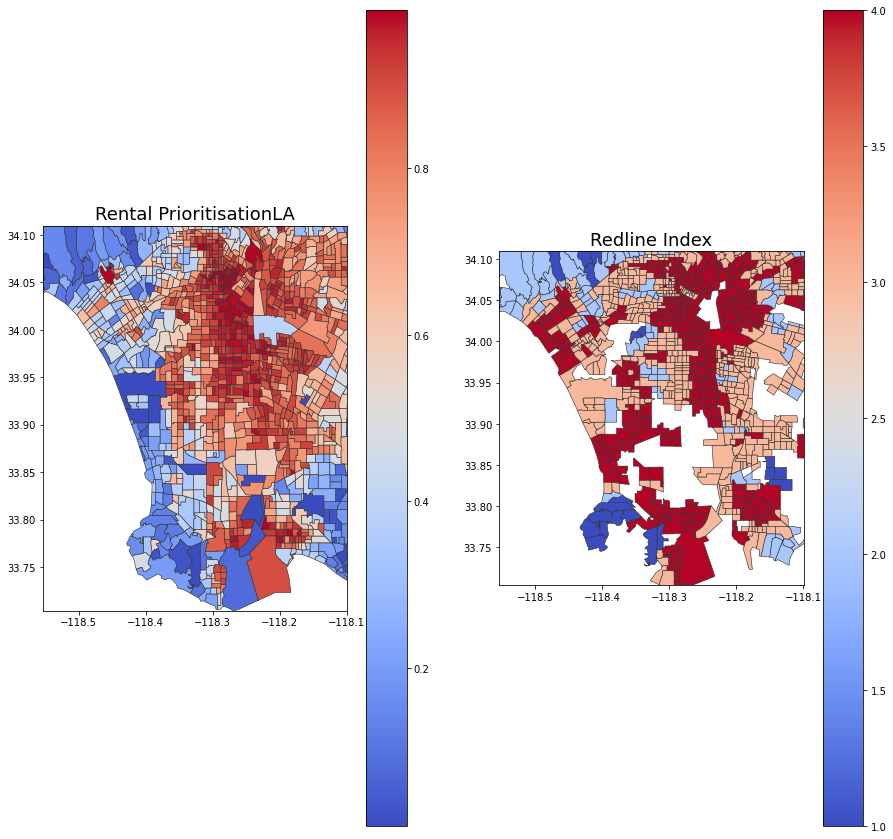

In [ ]:
rental_redline_map(33.703996, 34.109748,-118.553885, -118.099326,'LA',cali_redline)

#### LA

(-118.553885, -118.099326)

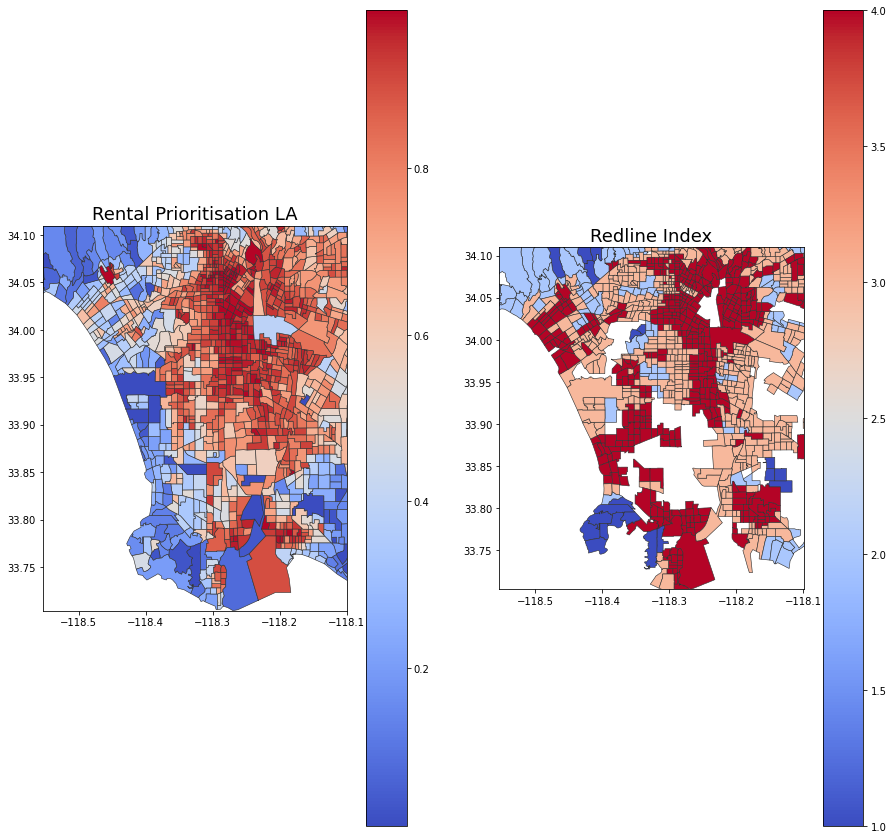

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation LA', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redline Index', fontsize=18)
cali_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(33.703996, 34.109748)
ax1.set_xlim(-118.553885, -118.099326)

ax2.set_ylim(33.703996, 34.109748)
ax2.set_xlim(-118.553885, -118.099326)


#### Bay Area

In [ ]:
#Mapping both data for Bay Area
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Bay Area', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redline Index', fontsize=18)
cali_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(37.709061, 37.808676)
ax1.set_xlim(-122.518342, -122.354233)

ax2.set_ylim(37.709061, 37.808676)
ax2.set_xlim(-122.518342, -122.354233)

#### New York

In [ ]:
#Mapping both data for New York City
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation New York', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Redlining in New York', fontsize=18)
ny_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(40.506299, 40.893601)
ax1.set_xlim(-74.259376, -73.725166)

ax2.set_ylim(40.506299, 40.893601)
ax2.set_xlim(-74.259376, -73.725166)

#### Chicago

In [ ]:
#Mapping both data for Chicago
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Chicago', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Chicago', fontsize=18)
chicago_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(41.653128, 41.892277)
ax1.set_xlim(-87.684688, -87.508906)

ax2.set_ylim(41.653128, 41.892277)
ax2.set_xlim(-87.684688, -87.508906)


#### Dallas

In [ ]:
#Mapping both data for Dallas
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Dallas', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Dallas', fontsize=18)
dallas_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(32.645012, 32.902506)
ax1.set_xlim(-96.914445, -96.628801)

ax2.set_ylim(32.645012, 32.902506)
ax2.set_xlim(-96.914445, -96.628801)

#### Detroit

In [ ]:
#Mapping both data for Detroit
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Detroit', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Detroit', fontsize=18)
detroit_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')


ax1.set_ylim(42.244090, 42.403499)
ax1.set_xlim(-83.243609, -82.898913)

ax2.set_ylim(42.244090, 42.403499)
ax2.set_xlim(-83.243609, -82.898913)

#### Minneapolis

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Minneapolis', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Minneapolis', fontsize=18)
minneapolis_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(44.842875, 45.019335)
ax1.set_xlim(-93.355556,-93.133770)

ax2.set_ylim(44.842875,45.019335)
ax2.set_xlim(-93.355556,-93.133770)

#### Newark

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Newark', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Newark', fontsize=18)
newark_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(40.657722, 40.795098)
ax1.set_xlim(-74.252472,-74.116516)

ax2.set_ylim(40.657722,40.795098)
ax2.set_xlim(-74.252472,-74.116516)

#### Tampa

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Tampa', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Tampa', fontsize=18)
tampa_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(27.815432, 28.136826)
ax1.set_xlim(-82.562047, -82.383519)

ax2.set_ylim(27.815432, 28.136826)
ax2.set_xlim(-82.562047, -82.383519)

## Spatial Autocorrelations between Redline Index and Rental Assistance

In [ ]:
#Creating separate datasets for each city to run correlations
rent_data['GEOID'] = rent_data['GEOID'].astype(float)
cali_redline_corr = cali_redline[['GEOID','ordinal_value']]
cali_rent_data = rent_data.merge(cali_redline_corr,how='left',on='GEOID')

In [ ]:
cali_rent_data.head()

GEOID state_name       county_name state_fips county_fips  \
0  1.073006e+09    Alabama  Jefferson County         01       01073   
1  1.073011e+09    Alabama  Jefferson County         01       01073   
2  1.073013e+09    Alabama  Jefferson County         01       01073   
3  1.073005e+09    Alabama  Jefferson County         01       01073   
4  1.073011e+09    Alabama  Jefferson County         01       01073   

   perc_cost_burdened_under_35k  perc_overcrowding_renter_1.50_or_more  \
0                      0.691943                               0.000000   
1                      0.533333                               0.012195   
2                      0.582278                               0.000000   
3                      0.386667                               0.000000   
4                      0.750000                               0.000000   

   perc_unemployed_laborforce  perc_renters  perc_poverty_12mnth  ...  \
0                    0.171334      0.412351             0.194963  ...   
1                    0.063052      0.525220             0.097222  ...   
2                    0.058507      0.606704             0.135747  ...   
3                    0.040827      0.214047             0.087376  ...   
4                    0.053528      0.078071             0.087675  ...   

   z_score_perc_no_hinsure_quantile  z_score_perc_person_of_color_quantile  \
0                              0.23                                   0.96   
1                              0.12                                   0.45   
2                              0.80                                   0.74   
3                              0.48                                   0.66   
4                              0.13                                   0.21   

   z_score_perc_public_assistance_quantile  \
0                                     0.01   
1                                     0.01   
2                                     0.70   
3                                     0.58   
4                                     0.63   

   z_score_perc_foreign_born_quantile  z_score_perc_30hamfi_quantile  \
0                                0.33                           0.47   
1                                0.85                           0.37   
2                                0.99                           0.24   
3                                0.58                           0.23   
4                                0.40                           0.29   

   z_score_perc_low_income_jobs_lost_quantile  num_ELI  grayed_out  \
0                                        0.93    100.0         0.0   
1                                        0.83    130.0         0.0   
2                                        0.87    185.0         0.0   
3                                        0.59     40.0         0.0   
4                                        0.64     70.0         0.0   

                                            geometry  ordinal_value  
0  MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...            NaN  
1  MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...            NaN  
2  MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...            NaN  
3  MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...            NaN  
4  MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...            NaN  

[5 rows x 50 columns]

In [ ]:
from scipy.stats import spearmanr

In [ ]:
def rental_redline_corr(counties,state_rent_data,t=None,state_name=None):

    county = state_rent_data[state_rent_data['county_name'].isin(counties)]
    county = county.dropna()

    if(state_name!=None):
        county = county[(county['state_name']==state_name)]

    if t!=None:
        county = county.loc[~county.GEOID.isin(t)]

    y = county['ordinal_value'].values
    w = Queen.from_dataframe(county)
    w.transform = 'R'
    x = county['total_index_quantile'].values
    moran = Moran(y,w)
    moran_loc = Moran_Local(y, w)
    moran_bv = Moran_BV(y, x, w)
    moran_loc_bv = Moran_Local_BV(y, x, w)
    # return(moran_bv.I)
    # print("Spearman Correlation Redline Index and Rental Assistance")
    coef, p = spearmanr(county['total_index_quantile'], county['ordinal_value'])
    return(moran_bv.I,coef,p)

In [ ]:
#LA Rental Assistance and Redline Correlation

la_counties = ['Los Angeles County']

la = cali_rent_data[cali_rent_data['county_name'].isin(la_counties)]

la = la.dropna()

t=['6037401311']
la = la.loc[~la.GEOID.isin(t)]

y = la['ordinal_value'].values
w = Queen.from_dataframe(la)
w.transform = 'R'
x = la['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


0.3287586432855363

In [ ]:
#SF Racial Minority and Rental Assistance Correlation

sf_counties = ['San Francisco County']

sf = cali_rent_data[cali_rent_data['county_name'].isin(sf_counties)]

sf = sf.dropna()

t=['06075980401']
sf = sf.loc[~sf.GEOID.isin(t)]

y = sf['ordinal_value'].values
w = Queen.from_dataframe(sf)
w.transform = 'R'
x = sf['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.2914612783168257

In [ ]:
#Creating separate datasets for each city to run correlations
ny_redline_corr = ny_redline[['GEOID','ordinal_value']]
ny_rent_data = rent_data.merge(ny_redline_corr,how='left',on='GEOID')
ny_rent_data.head()

NameError: name 'ny_redline' is not defined

In [ ]:
#NY Redline Index and Rental Assistance Correlation
ny_counties = ['Kings County','Richmond County', 'Bronx County', ' Queens County', 'New York County']
ny = ny_rent_data[ny_rent_data['county_name'].isin(ny_counties)]

t=['36061000100']
ny = ny.loc[~ny.GEOID.isin(t)]

ny = ny.dropna()

y = ny['ordinal_value'].values
w = Queen.from_dataframe(ny)
w.transform = 'R'
x = ny['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

NameError: name 'ny_rent_data' is not defined

In [ ]:
#Creating separate datasets for each city to run correlations
chicago_redline_corr = chicago_redline[['GEOID','ordinal_value']]
chicago_rent_data = rent_data.merge(chicago_redline_corr,how='left',on='GEOID')
chicago_rent_data.head()

GEOID state_name       county_name state_fips county_fips  \
0  1.073006e+09    Alabama  Jefferson County         01       01073   
1  1.073011e+09    Alabama  Jefferson County         01       01073   
2  1.073013e+09    Alabama  Jefferson County         01       01073   
3  1.073005e+09    Alabama  Jefferson County         01       01073   
4  1.073011e+09    Alabama  Jefferson County         01       01073   

   perc_cost_burdened_under_35k  perc_overcrowding_renter_1.50_or_more  \
0                      0.691943                               0.000000   
1                      0.533333                               0.012195   
2                      0.582278                               0.000000   
3                      0.386667                               0.000000   
4                      0.750000                               0.000000   

   perc_unemployed_laborforce  perc_renters  perc_poverty_12mnth  ...  \
0                    0.171334      0.412351             0.194963  ...   
1                    0.063052      0.525220             0.097222  ...   
2                    0.058507      0.606704             0.135747  ...   
3                    0.040827      0.214047             0.087376  ...   
4                    0.053528      0.078071             0.087675  ...   

   z_score_perc_no_hinsure_quantile  z_score_perc_person_of_color_quantile  \
0                              0.23                                   0.96   
1                              0.12                                   0.45   
2                              0.80                                   0.74   
3                              0.48                                   0.66   
4                              0.13                                   0.21   

   z_score_perc_public_assistance_quantile  \
0                                     0.01   
1                                     0.01   
2                                     0.70   
3                                     0.58   
4                                     0.63   

   z_score_perc_foreign_born_quantile  z_score_perc_30hamfi_quantile  \
0                                0.33                           0.47   
1                                0.85                           0.37   
2                                0.99                           0.24   
3                                0.58                           0.23   
4                                0.40                           0.29   

   z_score_perc_low_income_jobs_lost_quantile  num_ELI  grayed_out  \
0                                        0.93    100.0         0.0   
1                                        0.83    130.0         0.0   
2                                        0.87    185.0         0.0   
3                                        0.59     40.0         0.0   
4                                        0.64     70.0         0.0   

                                            geometry  ordinal_value  
0  MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...            NaN  
1  MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...            NaN  
2  MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...            NaN  
3  MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...            NaN  
4  MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...            NaN  

[5 rows x 50 columns]

In [ ]:
#Chicago Redline Index and Rental Assistance Correlation

chicago_counties = ['Cook County']

chicago = chicago_rent_data[(chicago_rent_data['county_name'].isin(chicago_counties))&(chicago_rent_data['state_name']=='Illinois')]

chicago = chicago.dropna()

y = chicago['ordinal_value'].values
w = Queen.from_dataframe(chicago)
w.transform = 'R'
x = chicago['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.2424364903719689

In [ ]:
#Creating separate datasets for each city to run correlations
dallas_redline_corr = dallas_redline[['GEOID','ordinal_value']]
dallas_rent_data = rent_data.merge(dallas_redline_corr,how='left',on='GEOID')
dallas_rent_data.head()

GEOID state_name       county_name state_fips county_fips  \
0  1.073006e+09    Alabama  Jefferson County         01       01073   
1  1.073011e+09    Alabama  Jefferson County         01       01073   
2  1.073013e+09    Alabama  Jefferson County         01       01073   
3  1.073005e+09    Alabama  Jefferson County         01       01073   
4  1.073011e+09    Alabama  Jefferson County         01       01073   

   perc_cost_burdened_under_35k  perc_overcrowding_renter_1.50_or_more  \
0                      0.691943                               0.000000   
1                      0.533333                               0.012195   
2                      0.582278                               0.000000   
3                      0.386667                               0.000000   
4                      0.750000                               0.000000   

   perc_unemployed_laborforce  perc_renters  perc_poverty_12mnth  ...  \
0                    0.171334      0.412351             0.194963  ...   
1                    0.063052      0.525220             0.097222  ...   
2                    0.058507      0.606704             0.135747  ...   
3                    0.040827      0.214047             0.087376  ...   
4                    0.053528      0.078071             0.087675  ...   

   z_score_perc_no_hinsure_quantile  z_score_perc_person_of_color_quantile  \
0                              0.23                                   0.96   
1                              0.12                                   0.45   
2                              0.80                                   0.74   
3                              0.48                                   0.66   
4                              0.13                                   0.21   

   z_score_perc_public_assistance_quantile  \
0                                     0.01   
1                                     0.01   
2                                     0.70   
3                                     0.58   
4                                     0.63   

   z_score_perc_foreign_born_quantile  z_score_perc_30hamfi_quantile  \
0                                0.33                           0.47   
1                                0.85                           0.37   
2                                0.99                           0.24   
3                                0.58                           0.23   
4                                0.40                           0.29   

   z_score_perc_low_income_jobs_lost_quantile  num_ELI  grayed_out  \
0                                        0.93    100.0         0.0   
1                                        0.83    130.0         0.0   
2                                        0.87    185.0         0.0   
3                                        0.59     40.0         0.0   
4                                        0.64     70.0         0.0   

                                            geometry  ordinal_value  
0  MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...            NaN  
1  MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...            NaN  
2  MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...            NaN  
3  MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...            NaN  
4  MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...            NaN  

[5 rows x 50 columns]

In [ ]:
#Dallas Racial Minority and Rental Assistance Correlation

dallas_counties = ['Dallas County']

dallas = dallas_rent_data[(dallas_rent_data['county_name'].isin(dallas_counties))&(dallas_rent_data['state_name']=='Texas')]

dallas = dallas.dropna()

y = dallas['ordinal_value'].values
w = Queen.from_dataframe(dallas)
w.transform = 'R'
x = dallas['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.5683876904765088

In [ ]:
#Creating separate datasets for each city to run correlations
detroit_redline_corr = detroit_redline[['GEOID','ordinal_value']]
detroit_rent_data = rent_data.merge(detroit_redline_corr,how='left',on='GEOID')
detroit_rent_data.head()

GEOID state_name       county_name state_fips county_fips  \
0  1.073006e+09    Alabama  Jefferson County         01       01073   
1  1.073011e+09    Alabama  Jefferson County         01       01073   
2  1.073013e+09    Alabama  Jefferson County         01       01073   
3  1.073005e+09    Alabama  Jefferson County         01       01073   
4  1.073011e+09    Alabama  Jefferson County         01       01073   

   perc_cost_burdened_under_35k  perc_overcrowding_renter_1.50_or_more  \
0                      0.691943                               0.000000   
1                      0.533333                               0.012195   
2                      0.582278                               0.000000   
3                      0.386667                               0.000000   
4                      0.750000                               0.000000   

   perc_unemployed_laborforce  perc_renters  perc_poverty_12mnth  ...  \
0                    0.171334      0.412351             0.194963  ...   
1                    0.063052      0.525220             0.097222  ...   
2                    0.058507      0.606704             0.135747  ...   
3                    0.040827      0.214047             0.087376  ...   
4                    0.053528      0.078071             0.087675  ...   

   z_score_perc_no_hinsure_quantile  z_score_perc_person_of_color_quantile  \
0                              0.23                                   0.96   
1                              0.12                                   0.45   
2                              0.80                                   0.74   
3                              0.48                                   0.66   
4                              0.13                                   0.21   

   z_score_perc_public_assistance_quantile  \
0                                     0.01   
1                                     0.01   
2                                     0.70   
3                                     0.58   
4                                     0.63   

   z_score_perc_foreign_born_quantile  z_score_perc_30hamfi_quantile  \
0                                0.33                           0.47   
1                                0.85                           0.37   
2                                0.99                           0.24   
3                                0.58                           0.23   
4                                0.40                           0.29   

   z_score_perc_low_income_jobs_lost_quantile  num_ELI  grayed_out  \
0                                        0.93    100.0         0.0   
1                                        0.83    130.0         0.0   
2                                        0.87    185.0         0.0   
3                                        0.59     40.0         0.0   
4                                        0.64     70.0         0.0   

                                            geometry  ordinal_value  
0  MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...            NaN  
1  MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...            NaN  
2  MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...            NaN  
3  MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...            NaN  
4  MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...            NaN  

[5 rows x 50 columns]

In [ ]:
#Detroit Racial Minority and Rental Assistance Correlation

detroit_counties = ['Wayne County']

detroit = detroit_rent_data[(detroit_rent_data['county_name'].isin(detroit_counties))&(detroit_rent_data['state_name']=='Michigan')]

#detroit = detroit.dropna()

y = detroit['ordinal_value'].values
w = Queen.from_dataframe(detroit)
w.transform = 'R'
x = detroit['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

nan

In [ ]:
#Creating separate datasets for each city to run correlations
minneapolis_redline_corr = minneapolis_redline[['GEOID','ordinal_value']]
minneapolis_rent_data = rent_data.merge(minneapolis_redline_corr,how='left',on='GEOID')

In [ ]:
#Minneapolis Racial Minority and Rental Assistance Correlation

minneapolis_counties = ['Hennepin County']

minneapolis = minneapolis_rent_data[minneapolis_rent_data['county_name'].isin(minneapolis_counties)]

minneapolis = minneapolis.dropna()

y = minneapolis['ordinal_value'].values
w = Queen.from_dataframe(minneapolis)
w.transform = 'R'
x = minneapolis['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.4881639708538139

In [ ]:
#Creating separate datasets for each city to run correlations
newark_redline_corr = newark_redline[['GEOID','ordinal_value']]
newark_rent_data = rent_data.merge(newark_redline_corr,how='left',on='GEOID')

In [ ]:
#Newark Racial Minority and Rental Assistance Correlation

newark_counties = ['Essex County']

newark = newark_rent_data[(newark_rent_data['county_name'].isin(newark_counties))&(newark_rent_data['state_name']=='New Jersey')]

newark = newark.dropna()

y = newark['ordinal_value'].values
w = Queen.from_dataframe(newark)
w.transform = 'R'
x = newark['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.5773046498115831

In [ ]:
#Creating separate datasets for each city to run correlations
tampa_redline_corr = tampa_redline[['GEOID','ordinal_value']]
tampa_rent_data = rent_data.merge(tampa_redline_corr,how='left',on='GEOID')

In [ ]:
#Tampa Racial Minority and Rental Assistance Correlation

tampa_counties = ['Hillsborough County']

tampa = tampa_rent_data[(tampa_rent_data['county_name'].isin(tampa_counties))&(tampa_rent_data['state_name']=='Florida')]

tampa = tampa.dropna()

y = tampa['ordinal_value'].values
w = Queen.from_dataframe(tampa)
w.transform = 'R'
x = tampa['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


0.4648110982283353

## Spearman Correlation Redline Index and Rental Assistance

In [ ]:
#LA
from scipy.stats import spearmanr

coef, p = spearmanr(la['total_index_quantile'], la['ordinal_value'])
print(coef)
print(p)

0.3631252801404452
2.19816627867561e-47


In [ ]:
#SF
coef, p = spearmanr(sf['total_index_quantile'], sf['ordinal_value'])
print(coef)
print(p)

0.30776774088739606
4.690547292304931e-05


In [ ]:
#NY
coef, p = spearmanr(ny['total_index_quantile'], ny['ordinal_value'])
print(coef)
print(p)

0.14672480902813265
2.1067912725438816e-08


In [ ]:
#Chicago
coef, p = spearmanr(chicago['total_index_quantile'], chicago['ordinal_value'])
print(coef)
print(p)

0.23736458666654064
1.9317055817164774e-14


In [ ]:
#Dallas
coef, p = spearmanr(dallas['total_index_quantile'], dallas['ordinal_value'])
print(coef)
print(p)

0.6171193824467718
3.7479509026458983e-14


In [ ]:
#Detroit
coef, p = spearmanr(detroit['total_index_quantile'], detroit['ordinal_value'])
print(coef)
print(p)

nan
nan


In [ ]:
#Minneapolis
coef, p = spearmanr(minneapolis['total_index_quantile'], minneapolis['ordinal_value'])
print(coef)
print(p)

0.5984003056380801
3.365288412030128e-13


In [ ]:
#Newark
coef, p = spearmanr(newark['total_index_quantile'], newark['ordinal_value'])
print(coef)
print(p)

0.5574927671296379
4.6867848121101904e-18


In [ ]:
#Tampa
coef, p = spearmanr(tampa['total_index_quantile'], tampa['ordinal_value'])
print(coef)
print(p)

0.5942121815683159
5.578510601611458e-07


In [ ]:
#final

In [ ]:
def results(city):

    state_name=None
    t=None

    if (city=='New York'):
        flag=1
        y1,y2,x1,x2=40.506299, 40.893601,-74.259376, -73.725166
        counties= ['Kings County','Richmond County', 'Bronx County', ' Queens County', 'New York County']
        t=['36061000100']
        state_redline=ny_redline
        rent_data=ny_rent_data
    elif (city=='Los Angeles'):
        flag=1
        y1,y2,x1,x2=33.703996, 34.109748,-118.553885, -118.099326
        counties= ['Los Angeles County']
        t=['6037401311']
        state_redline=cali_redline
        rent_data=cali_rent_data
    elif (city=='San Francisco'):
        flag=1
        y1,y2,x1,x2=37.709061, 37.808676,-122.518342, -122.354233
        counties= ['San Francisco County']
        t=['06075980401']
        state_redline=cali_redline
        rent_data=cali_rent_data
    elif (city=='Chicago'):
        flag=1
        y1,y2,x1,x2=41.653128, 41.892277,-87.684688, -87.508906
        counties= ['Cook County']
        state_name='Illinois'
        state_redline=chicago_redline
        rent_data=chicago_rent_data
    # elif (city=='Detroit'):
    #     y1,y2,x1,x2=42.244090, 42.403499,-83.243609, -82.898913
    #     counties= ['Wayne County']
    #     state_name='Michigan'
    #     state_redline=detroit_redline
    #     rent_data=detroit_rent_data
    elif (city=='Minneapolis'):
        flag=1
        y1,y2,x1,x2=44.842875, 45.019335,-93.355556,-93.133770
        counties= ['Hennepin County']
        state_redline=minneapolis_redline
        rent_data=minneapolis_rent_data
    elif (city=='Newark'):
        flag=1
        y1,y2,x1,x2=40.657722, 40.795098,-74.252472,-74.116516
        counties= ['Essex County']
        state_name='New Jersey'
        state_redline=newark_redline
        rent_data=newark_rent_data
    elif (city=='Dallas'):
        flag=1
        y1,y2,x1,x2=32.645012, 32.902506,-96.914445, -96.628801
        counties= ['Dallas County']
        state_name='Texas'
        state_redline=dallas_redline
        rent_data=dallas_rent_data
    else:
        flag=0
        print("Please enter valid city")
    
    if(flag==1):

        print("************* " + city + " ***************")

        print("Racial Minority and Rental Assistance Correlation")
        print(correlation_racial_rental (counties,state_name,t))

        print("Rental Assistance and Redline Correlation")
        print(rental_redline_corr(counties,rent_data,t,state_name)[0])

        print("Spearman Correlation Redline Index and Rental Assistance")
        print(rental_redline_corr(counties,rent_data,t,state_name)[1:])

        
        #plots
        f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20, 12))

        ax1.set_title('Minority Distribution', fontsize=18)
        minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

        ax2.set_title('Rental Prioritisation', fontsize=18)
        rent_data.plot(ax=ax2, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

        ax3.set_title('Redlining', fontsize=18)
        redline_data.plot(ax= ax3, column = 'holc_grade',categorical=True,cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':6,'frameon':False})

        ax4.set_title('Redline Index', fontsize=18)
        state_redline.plot(ax=ax4, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

        ax1.set_ylim(y1,y2)
        ax1.set_xlim(x1,x2)

        ax2.set_ylim(y1,y2)
        ax2.set_xlim(x1,x2)

        ax3.set_ylim(y1,y2)
        ax3.set_xlim(x1,x2)

        ax4.set_ylim(y1,y2)
        ax4.set_xlim(x1,x2)

        plt.suptitle(city,fontsize=25)

************* Dallas ***************
Racial Minority and Rental Assistance Correlation
0.55787523963193
Rental Assistance and Redline Correlation
0.5683876904765088
Spearman Correlation Redline Index and Rental Assistance
(0.6171193824467718, 3.7479509026458983e-14)


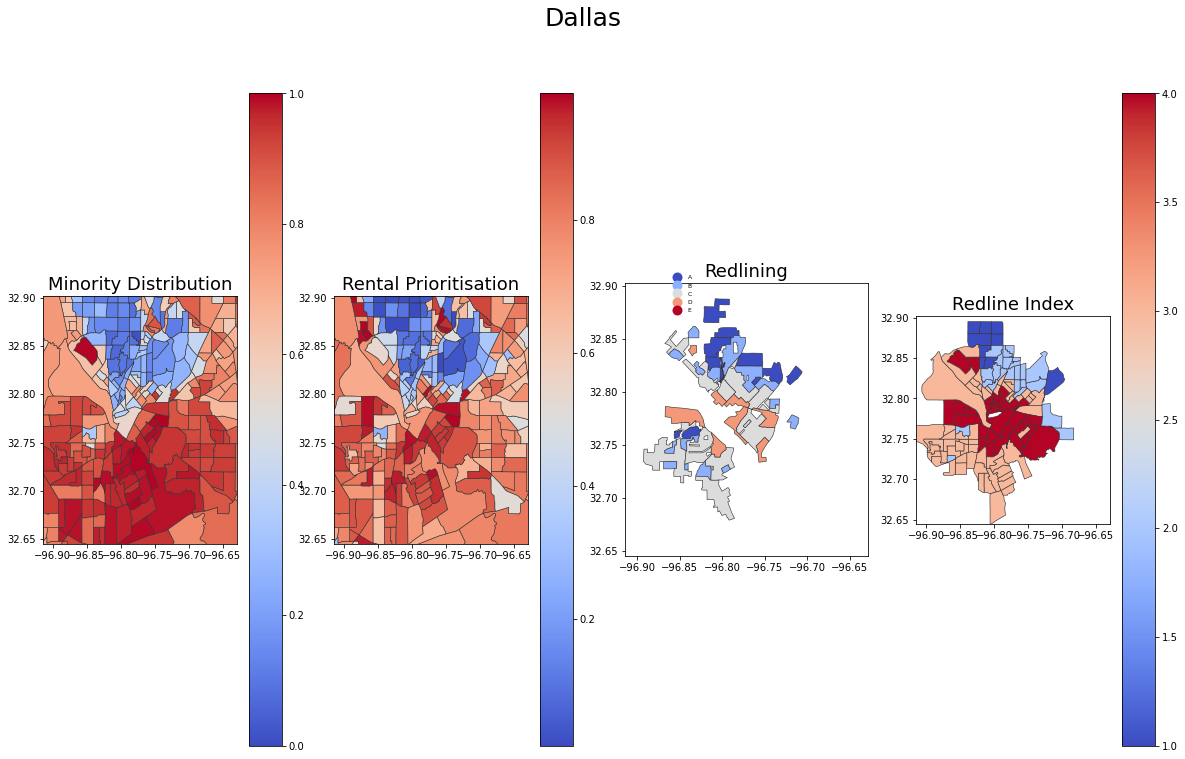

In [ ]:
results('Dallas')


In [ ]:
correlation_table = pd.DataFrame(columns=['City_name', 'race_rental_corr','rental_redline_corr','rental_redline_spearman','spearman_p_value'])

In [ ]:
correlation_table.loc[len(correlation_table)]=['New York',correlation_racial_rental(['Kings County','Richmond County', 'Bronx County', ' Queens County', 'New York County'],None,['36061000100']),rental_redline_corr(['Kings County','Richmond County', 'Bronx County', ' Queens County', 'New York County'],ny_rent_data,['36061000100'])[0],rental_redline_corr(['Kings County','Richmond County', 'Bronx County', ' Queens County', 'New York County'],ny_rent_data,['36061000100'])[1],rental_redline_corr(['Kings County','Richmond County', 'Bronx County', ' Queens County', 'New York County'],ny_rent_data,['36061000100'])[2]] 
correlation_table.loc[len(correlation_table)]=['Los Angeles',correlation_racial_rental(['Los Angeles County']),rental_redline_corr(['Los Angeles County'],cali_rent_data,['6037401311'])[0],rental_redline_corr(['Los Angeles County'],cali_rent_data,['6037401311'])[1],rental_redline_corr(['Los Angeles County'],cali_rent_data,['6037401311'])[2]]
correlation_table.loc[len(correlation_table)]=['San Francisco',correlation_racial_rental(['San Francisco County'],None,['06075980401']),rental_redline_corr(['San Francisco County'],cali_rent_data,['06075980401'])[0],rental_redline_corr(['San Francisco County'],cali_rent_data,['06075980401'])[1],rental_redline_corr(['San Francisco County'],cali_rent_data,['06075980401'])[2]] 
correlation_table.loc[len(correlation_table)]=['Chicago',correlation_racial_rental(['Cook County'],'Illinois'),rental_redline_corr(['Cook County'],chicago_rent_data,None,'Illinois')[0],rental_redline_corr(['Cook County'],chicago_rent_data,None,'Illinois')[1],rental_redline_corr(['Cook County'],chicago_rent_data,None,'Illinois')[2]] 
# correlation_table.loc[len(correlation_table)]=['Detroit',correlation_racial_rental(['Wayne County'],'Michigan'),rental_redline_corr(['Wayne County'],detroit_rent_data,None,'Michigan')[0],rental_redline_corr(['Wayne County'],detroit_rent_data,None,'Michigan')[1],rental_redline_corr(['Wayne County'],detroit_rent_data,None,'Michigan')[2]] 
correlation_table.loc[len(correlation_table)]=['Minneapolis',correlation_racial_rental(['Hennepin County']),rental_redline_corr(['Hennepin County'],minneapolis_rent_data)[0],rental_redline_corr(['Hennepin County'],minneapolis_rent_data)[1],rental_redline_corr(['Hennepin County'],minneapolis_rent_data)[2]] 
correlation_table.loc[len(correlation_table)]=['Newark',correlation_racial_rental(['Essex County'],'New Jersey'),rental_redline_corr(['Essex County'],newark_rent_data,None,'New Jersey')[0],rental_redline_corr(['Essex County'],newark_rent_data,None,'New Jersey')[1],rental_redline_corr(['Essex County'],newark_rent_data,None,'New Jersey')[2]] 
correlation_table.loc[len(correlation_table)]=['Dallas',correlation_racial_rental(['Dallas County'],'Texas'),rental_redline_corr(['Dallas County'],dallas_rent_data,None,'Texas')[0],rental_redline_corr(['Dallas County'],dallas_rent_data,None,'Texas')[1],rental_redline_corr(['Dallas County'],dallas_rent_data,None,'Texas')[2]] 

/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)
/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


In [ ]:
correlation_table

City_name  race_rental_corr  rental_redline_corr  \
0       New York          0.562351             0.154238   
1    Los Angeles          0.638782             0.328759   
2  San Francisco          0.631768             0.291461   
3        Chicago          0.696917             0.241990   
4    Minneapolis          0.557660             0.488164   
5         Newark          0.834679             0.574609   
6         Dallas          0.557875             0.568388   

   rental_redline_spearman  spearman_p_value  
0                 0.146725      2.106791e-08  
1                 0.363125      2.198166e-47  
2                 0.307768      4.690547e-05  
3                 0.237365      1.931706e-14  
4                 0.598400      3.365288e-13  
5                 0.557493      4.686785e-18  
6                 0.617119      3.747951e-14